In [239]:
# importing necessary libraries for analysis and visualiation
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

In [240]:
Lead_df= pd.read_csv("E:\Leads.csv")

In [241]:
Lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [242]:
#checking basic attributes of data i.e. shape, description, info
Lead_df.shape

(9240, 37)

In [243]:
Lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [244]:
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [245]:
# Removing Id values since they are unique for everyone
Lead_df1=Lead_df.drop(['Prospect ID','Lead Number'],axis=1)
Lead_df1.shape

(9240, 35)

In [246]:
# Checking columns that  entry Select
for col in Lead_df1.columns:
    if Lead_df1[col].astype(str).str.contains("Select").any():
        print(col)

Specialization
How did you hear about X Education
Lead Profile
City


In [247]:
# Converting "Select" values to nan
Lead_df1['Specialization'] = Lead_df1['Specialization'].replace("Select", np.nan)
Lead_df1['How did you hear about X Education'] = Lead_df1['How did you hear about X Education'].replace("Select", np.nan)
Lead_df1['Lead Profile'] = Lead_df1['Lead Profile'].replace("Select", np.nan)
Lead_df1['City'] = Lead_df1['City'].replace("Select", np.nan)

In [248]:
# Checking null values again
Lead_df1_null1=(Lead_df1.isnull().mean())*100
Lead_df1_null1

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [249]:
# Filtering out columns with missing value percentage greater than 40
Lead_df1_drop1=Lead_df1_null1[Lead_df1_null1>40]
Lead_df1_drop_column=list(Lead_df1_drop1.index)
Lead_df1_drop1

How did you hear about X Education    78.463203
Lead Quality                          51.590909
Lead Profile                          74.188312
Asymmetrique Activity Index           45.649351
Asymmetrique Profile Index            45.649351
Asymmetrique Activity Score           45.649351
Asymmetrique Profile Score            45.649351
dtype: float64

In [250]:
# Dropping the columns with missing value percentage greater than 40
Lead_df1.drop(Lead_df1_drop_column, axis=1, inplace=True)

In [251]:
# Checking null values again
leads1_null1=(Lead_df1.isnull().mean())*100
leads1_null1

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [252]:
## Also from business prospective, since X Education sells online cources it will not affect the convertion rate much, 
## hence we can drop them
Lead_df1.drop(["Country","City"], axis=1, inplace=True)

In [253]:
## Checking value counts
(Lead_df1.Specialization.value_counts(normalize=True,dropna=False)*100)

Specialization
NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: proportion, dtype: float64

In [254]:
## Since Specialization of potential customers is un-known, we can assign Nan values as unknown
Lead_df1["Specialization"].fillna("Unknown",inplace=True)

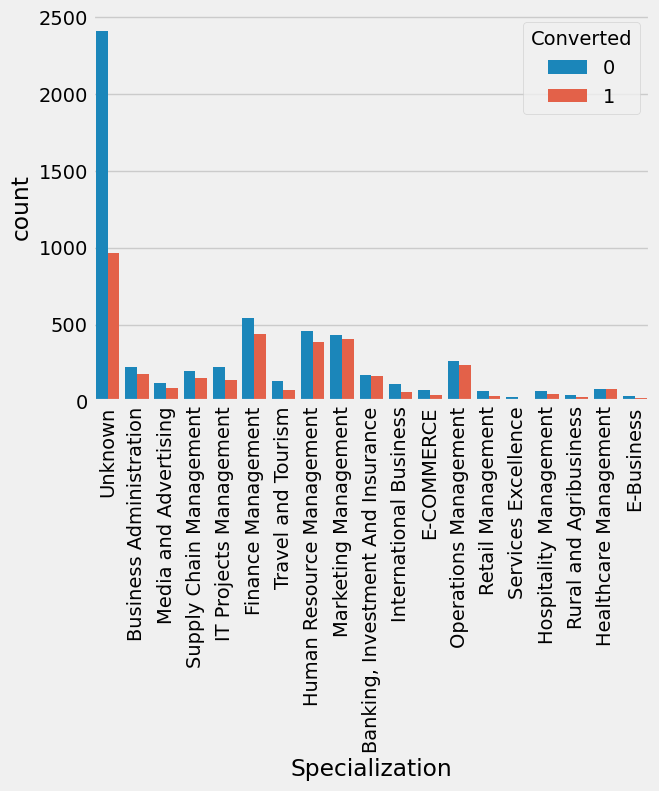

In [255]:
# Plotting the counts of Specialization for converted and non-converted leads
Lead_df1['Converted'] = Lead_df1['Converted'].astype(str)
sns.countplot(data=Lead_df1, x="Specialization",hue="Converted")
plt.xticks(rotation=90)
plt.show()

##Since specialization column has a large no. of unique values it will be good to combine unique values having very less % of counts for sake of simplicity

In [256]:
## creating a new column Specialization_new and combining all unique values with very less % of counts
Lead_df1["Specialization_new"]=np.where(Lead_df1["Specialization"].isin(["Unknown","Finance Management","Human Resource Management","Marketing Management","Operations Management","Business Administration","IT Projects Management","Supply Chain Management","Banking, Investment And Insurance","Travel and Tourism","Media and Advertising"]),Lead_df1["Specialization"],"Other_specializations")

In [257]:
# Checking value counts of Specialization_new column
(Lead_df1.Specialization_new.value_counts(normalize=True,dropna=False))*100

Specialization_new
Unknown                              36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Other_specializations                 9.015152
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
Name: proportion, dtype: float64

In [258]:
## Dropping the specialization column
Lead_df1.drop(["Specialization"],axis=1,inplace=True)

In [259]:
## Checking value counts
(Lead_df1["What is your current occupation"].value_counts(normalize=True, dropna=False)*100)

What is your current occupation
Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: proportion, dtype: float64

In [260]:
## Imputing missing values of What is your current occupation with Not_specified
Lead_df1["What is your current occupation"].fillna("Not_specified",inplace=True)

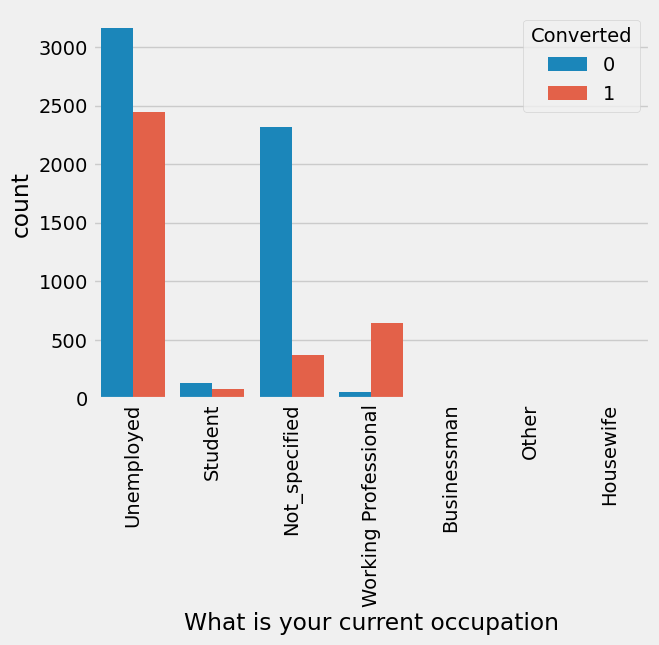

In [261]:
# Plotting the counts of What is your current occupation for converted and non-converted leads
sns.countplot(data=Lead_df1, x="What is your current occupation",hue="Converted")
plt.xticks(rotation=90)
plt.show()

In [262]:
## creating a new column What is your current occupation 1 and combining all unique values with very less % of counts
Lead_df1["What is your current occupation 1"]=np.where(Lead_df1["What is your current occupation"].isin(["Unemployed","Not_specified","Working Professional","Student"]),Lead_df1["What is your current occupation"],"Other_occup")

In [263]:
## checking unique value percentage of  What is your current occupation 1 column
(Lead_df1["What is your current occupation 1"].value_counts(normalize=True,dropna=False)*100)

What is your current occupation 1
Unemployed              60.606061
Not_specified           29.112554
Working Professional     7.640693
Student                  2.272727
Other_occup              0.367965
Name: proportion, dtype: float64

In [264]:
## Dropping the What is your current occupation column
Lead_df1.drop(["What is your current occupation"],axis=1,inplace=True)

In [265]:
## Checking value counts
(Lead_df1["What matters most to you in choosing a course"].value_counts(normalize=True, dropna=False)*100)

What matters most to you in choosing a course
Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: proportion, dtype: float64

In [266]:
## Imputing missing values of What matters most to you in choosing a course with Not_specified
Lead_df1["What matters most to you in choosing a course"].fillna("Not_specified",inplace=True)

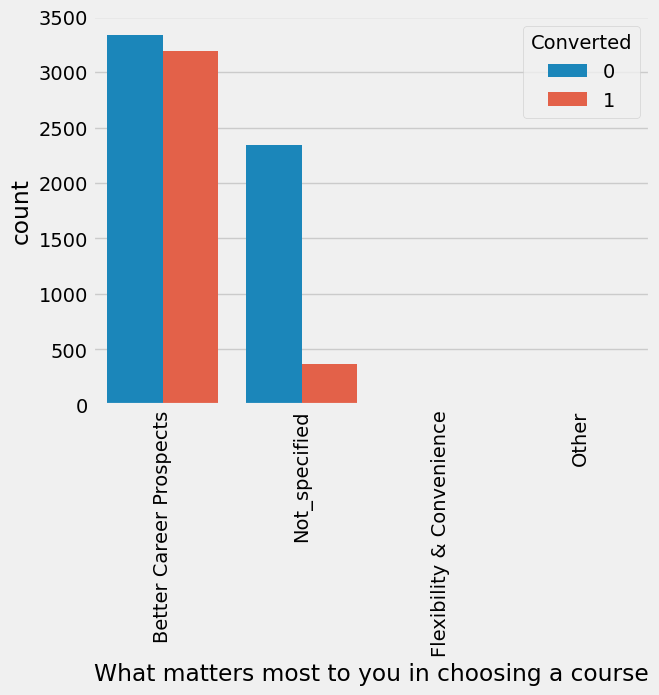

In [267]:
# Plotting the counts of What matters most to you in choosing a course for converted and non-converted leads
sns.countplot(data=Lead_df1, x="What matters most to you in choosing a course",hue="Converted")
plt.xticks(rotation=90)
plt.show()

In [268]:
## creating a new column What matters most to you in choosing a course new and combining all unique values with very less % of counts
Lead_df1["What matters most to you in choosing a course new"]=np.where(Lead_df1["What matters most to you in choosing a course"].isin(["Better Career Prospects","Not_specified"]),Lead_df1["What matters most to you in choosing a course"],"Other_reasons")

In [269]:
## checking unique value percentage of What matters most to you in choosing a course 1 column
(Lead_df1["What matters most to you in choosing a course new"].value_counts(normalize=True,dropna=False)*100)

What matters most to you in choosing a course new
Better Career Prospects    70.649351
Not_specified              29.318182
Other_reasons               0.032468
Name: proportion, dtype: float64

In [270]:
## Dropping the What matters most to you in choosing a course column
Lead_df1.drop(["What matters most to you in choosing a course"],axis=1,inplace=True)

In [271]:
## Checking value counts
(Lead_df1["Tags"].value_counts(normalize=True, dropna=False)*100)

Tags
NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                        

In [272]:
## Imputing missing values of Tags with Unknown
Lead_df1["Tags"].fillna("Unknown",inplace=True)

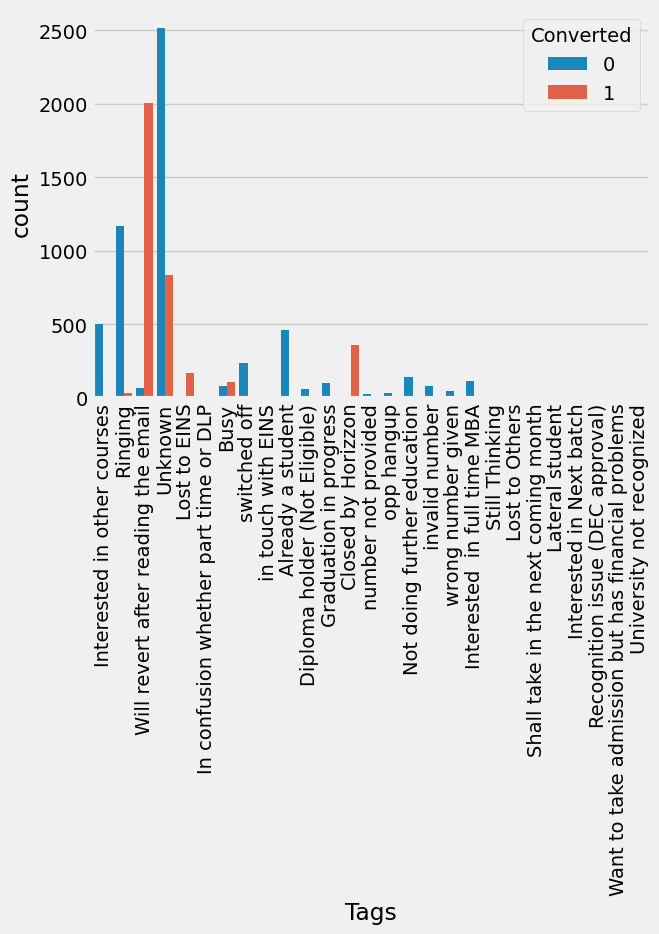

In [273]:
# Plotting the counts of tags for converted and non-converted leads
sns.countplot(data=Lead_df1, x="Tags",hue="Converted")
plt.xticks(rotation=90)
plt.show()

In [274]:
## creating a new column Tags_new and combining all unique values with very less % of counts 
Lead_df1["Tags_new"]=np.where(Lead_df1["Tags"].isin(["Will revert after reading the email","Ringing","Interested in other courses","Already a student","Closed by Horizzon","switched off","Busy","Unknown","Lost to EINS"]),Lead_df1["Tags"],"Other_tags")

In [275]:
## checking unique value percentage of Tags new Column
(Lead_df1["Tags_new"].value_counts(normalize=True,dropna=False)*100)

Tags_new
Unknown                                36.287879
Will revert after reading the email    22.424242
Ringing                                13.019481
Other_tags                              7.305195
Interested in other courses             5.551948
Already a student                       5.032468
Closed by Horizzon                      3.874459
switched off                            2.597403
Busy                                    2.012987
Lost to EINS                            1.893939
Name: proportion, dtype: float64

In [276]:
## Dropping the orignal Tags column
Lead_df1.drop(["Tags"],axis=1,inplace=True)

In [277]:
# checking null % of lead source
(Lead_df1["Lead Source"].isnull().mean()*100)

0.38961038961038963

In [278]:
## Since percentage of Nan values for Lead Source column is very less, we can impute them with its mode value
lead_source_mode=Lead_df1["Lead Source"].mode()[0]
Lead_df1["Lead Source"].fillna(lead_source_mode,inplace=True)

In [279]:
# checking null % of lead source again
(Lead_df1["Lead Source"].isnull().mean()*100)

0.0

In [280]:
## Checking Value Counts
(Lead_df1["Lead Source"].value_counts(normalize=True, dropna=False)*100)

Lead Source
Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: proportion, dtype: float64

In [281]:
## Since unique value google and Google is repeated twice, we can merge them both
Lead_df1["Lead Source 1"] = Lead_df1["Lead Source"].str.replace("google", "Google")

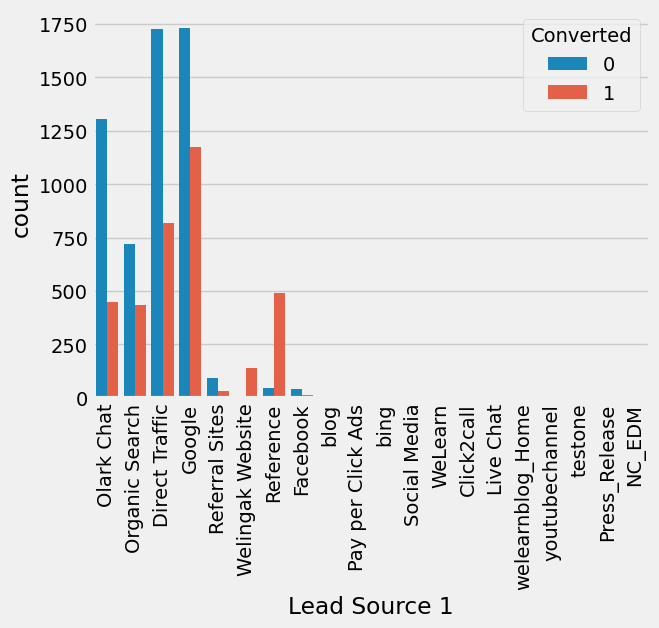

In [282]:
# Plotting the counts of Lead Source for converted and non-converted leads
sns.countplot(data=Lead_df1, x="Lead Source 1",hue="Converted")
plt.xticks(rotation=90)
plt.show()

In [283]:
## creating a new column Lead Source new_new and combining all unique values with very less % of counts 
Lead_df1["Lead Source new"]=np.where(Lead_df1["Lead Source 1"].isin(["Google","Direct Traffic","Olark Chat","Organic Search","Reference","Welingak Website"]),Lead_df1["Lead Source 1"],"Other_lead_source")

In [284]:
# Checking value counts of lead source new column
(Lead_df1["Lead Source new"].value_counts(normalize=True, dropna=False))*100

Lead Source new
Google               31.482684
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Other_lead_source     2.196970
Welingak Website      1.536797
Name: proportion, dtype: float64

In [285]:
# Dropping the orignal lead source 1 column
Lead_df1.drop(["Lead Source 1"], axis=1,inplace=True)
Lead_df1.drop(["Lead Source"], axis=1,inplace=True)

In [286]:
# Checking value counts of page views per visit
Lead_df1["Page Views Per Visit"].value_counts(normalize=True, dropna=False)*100

Page Views Per Visit
0.00    23.690476
2.00    19.426407
3.00    12.943723
4.00     9.696970
1.00     7.045455
          ...    
2.56     0.010823
6.33     0.010823
1.64     0.010823
8.21     0.010823
2.08     0.010823
Name: proportion, Length: 115, dtype: float64

In [287]:
# Calculating median of Total Visits column
Lead_df1["TotalVisits"].median()

3.0

In [288]:
## Since percentage of Nan values for Total Visits column is very less, we can impute them with its median value
lead_visits_mode=Lead_df1["TotalVisits"].median()
Lead_df1["TotalVisits"].fillna(lead_visits_mode,inplace=True)

In [289]:
# Checking value counts of page views per visit
Lead_df1["Page Views Per Visit"].value_counts(normalize=True, dropna=False)*100

Page Views Per Visit
0.00    23.690476
2.00    19.426407
3.00    12.943723
4.00     9.696970
1.00     7.045455
          ...    
2.56     0.010823
6.33     0.010823
1.64     0.010823
8.21     0.010823
2.08     0.010823
Name: proportion, Length: 115, dtype: float64

In [290]:
# Calculating median of Page Views Per Visit
Lead_df1["Page Views Per Visit"].median()
## Since percentage of Nan values for Page Views Per Visit column is very less, we can impute them with its mode value
lead_page_mode=Lead_df1["Page Views Per Visit"].median()
Lead_df1["Page Views Per Visit"].fillna(lead_page_mode,inplace=True)

In [291]:
# Checking value counts of Last acivity column
(Lead_df1["Last Activity"].value_counts(normalize=True, dropna=False)*100)

Last Activity
Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: proportion, dtype: float64

In [292]:
## Since percentage of Nan values for Last Activity column is very less, we can impute them with its mode value
lead_page_mode=Lead_df1["Last Activity"].mode()[0]
Lead_df1["Last Activity"].fillna(lead_page_mode,inplace=True)

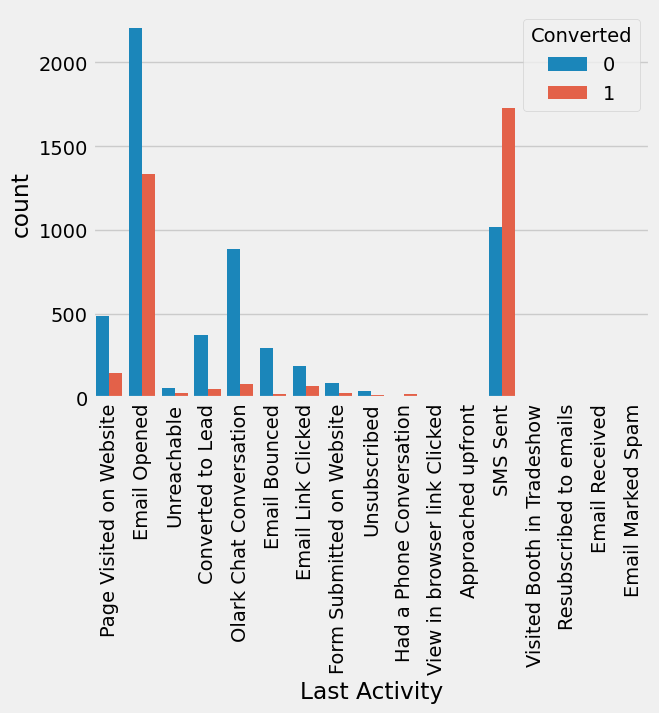

In [293]:
# Plotting the counts of Last activity for converted and non-converted leads
sns.countplot(data=Lead_df1, x="Last Activity",hue="Converted")
plt.xticks(rotation=90)
plt.show()

In [294]:
## creating a new column "Last Activity new" and combining all unique values with very less % of counts 
Lead_df1["Last Activity new"]=np.where(Lead_df1["Last Activity"].isin(["Email Opened","SMS Sent","Olark Chat Conversation","Page Visited on Website","Converted to Lead","Email Bounced","Email Link Clicked"]),Lead_df1["Last Activity"],"Other_last_activities")

In [295]:
# Checking value counts of Last Activity new column
(Lead_df1["Last Activity new"].value_counts(normalize=True, dropna=False)*100)

Last Activity new
Email Opened               38.311688
SMS Sent                   29.707792
Olark Chat Conversation    10.530303
Page Visited on Website     6.926407
Converted to Lead           4.632035
Email Bounced               3.528139
Other_last_activities       3.474026
Email Link Clicked          2.889610
Name: proportion, dtype: float64

In [296]:
# Dropping the orignal Last Activity column
Lead_df1.drop(["Last Activity"], axis=1,inplace=True)

In [297]:
# Checking value counts of lead origin
(Lead_df1["Lead Origin"].value_counts(normalize=True, dropna=False))*100

Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: proportion, dtype: float64

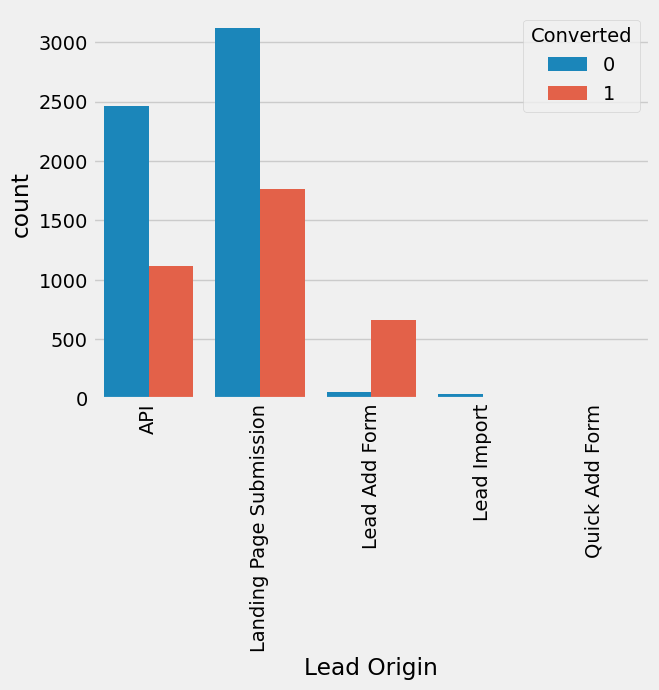

In [298]:
# Plotting the counts of Lead Origin for converted and non-converted leads
sns.countplot(data=Lead_df1, x="Lead Origin",hue="Converted")
plt.xticks(rotation=90)
plt.show()

In [299]:
## creating a new column Lead origin new and combining all unique values with very less % of counts 
Lead_df1["Lead Origin new"]=np.where(Lead_df1["Lead Origin"].isin(["Landing Page Submission","API","Lead Add Form"]),Lead_df1["Lead Origin"],"Other_origin")

In [300]:
# Checking value counts of lead origin new
(Lead_df1["Lead Origin new"].value_counts(normalize=True, dropna=False))*100

Lead Origin new
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Other_origin                0.606061
Name: proportion, dtype: float64

In [301]:
# Dropping the orignal lead origin column
Lead_df1.drop(["Lead Origin"], axis=1,inplace=True)

In [302]:
# Checking value counts of Last Notable Activity
(Lead_df1["Last Notable Activity"].value_counts(normalize=True, dropna=False))*100

Last Notable Activity
Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: proportion, dtype: float64

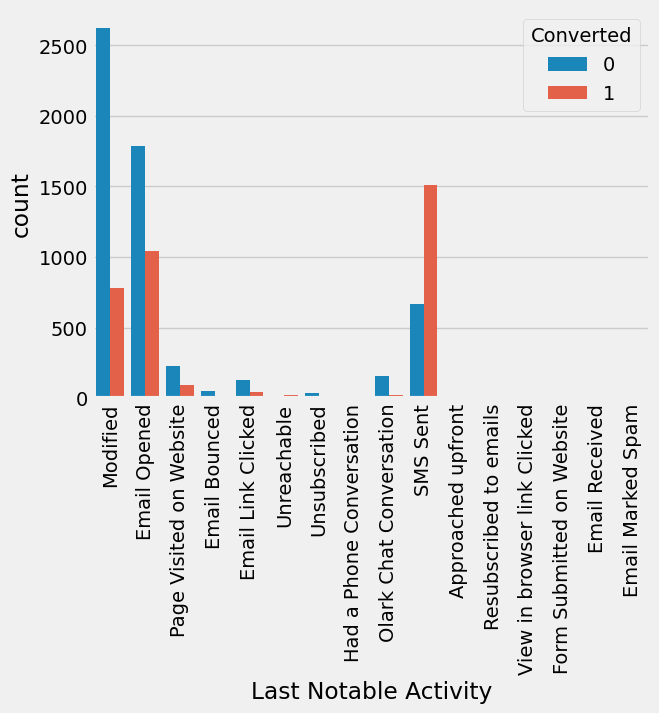

In [303]:
# Plotting the counts of Last Notable Activity for converted and non-converted leads
sns.countplot(data=Lead_df1, x="Last Notable Activity",hue="Converted")
plt.xticks(rotation=90)
plt.show()

In [304]:
## creating a new column Last Notable Activity new and combining all unique values with very less % of counts
Lead_df1["Last Notable Activity new"]=np.where(Lead_df1["Last Notable Activity"].isin(["Modified","Email Opened","SMS Sent","Page Visited on Website","Olark Chat Conversation","Email Link Clicked"]),Lead_df1["Last Notable Activity"],"Other_notable_activity")

In [305]:
# Dropping the orignal lead notable activty column
Lead_df1.drop(["Last Notable Activity"], axis=1,inplace=True)

In [306]:
# Checking value counts of Last Notable Activity new
(Lead_df1["Last Notable Activity new"].value_counts(normalize=True, dropna=False))*100

Last Notable Activity new
Modified                   36.872294
Email Opened               30.595238
SMS Sent                   23.506494
Page Visited on Website     3.441558
Olark Chat Conversation     1.980519
Email Link Clicked          1.872294
Other_notable_activity      1.731602
Name: proportion, dtype: float64

In [307]:
# Checking null values again
lead_df1_null1=(Lead_df1.isnull().mean())*100
lead_df1_null1

Do Not Email                                         0.0
Do Not Call                                          0.0
Converted                                            0.0
TotalVisits                                          0.0
Total Time Spent on Website                          0.0
Page Views Per Visit                                 0.0
Search                                               0.0
Magazine                                             0.0
Newspaper Article                                    0.0
X Education Forums                                   0.0
Newspaper                                            0.0
Digital Advertisement                                0.0
Through Recommendations                              0.0
Receive More Updates About Our Courses               0.0
Update me on Supply Chain Content                    0.0
Get updates on DM Content                            0.0
I agree to pay the amount through cheque             0.0
A free copy of Mastering The In

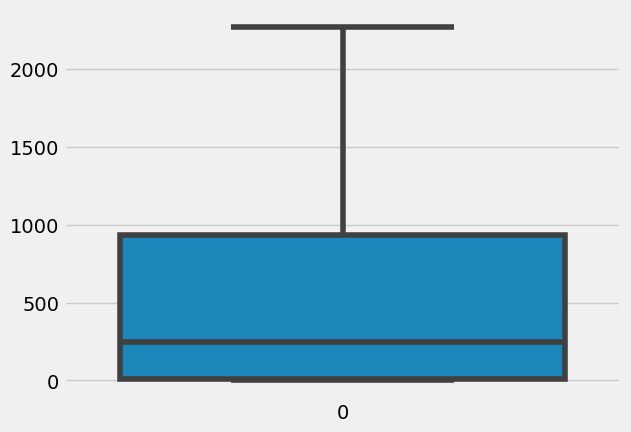

In [308]:
# Plotting box plot for Total Time Spent on Website column
sns.boxplot(Lead_df1["Total Time Spent on Website"])
plt.show()

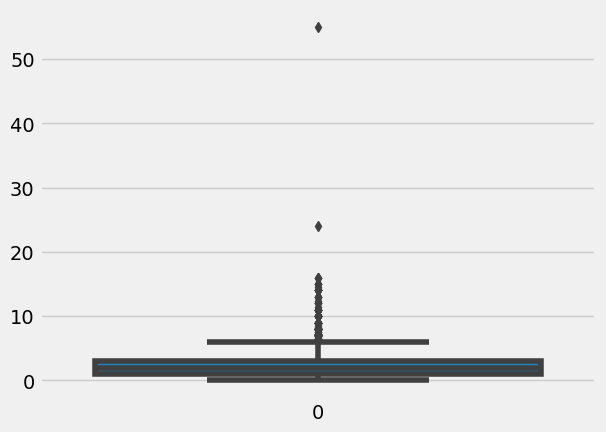

In [309]:
##Outlier check of Page Views Per Visit
sns.boxplot(Lead_df1["Page Views Per Visit"])
plt.show()

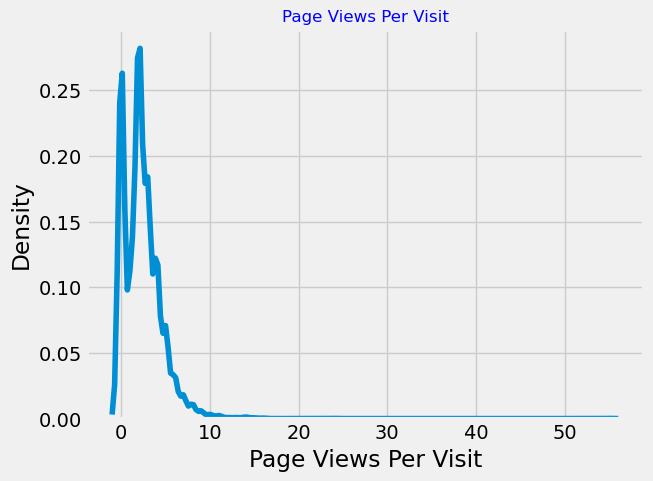

In [310]:
# Checking the kde plot 
sns.kdeplot(data=Lead_df1["Page Views Per Visit"])
plt.title("Page Views Per Visit",fontdict={"fontsize":12,"fontweight":10,"color":"blue"})
plt.show()

In [311]:
# Checking various quantile values of Page Views Per Visit
Lead_df1["Page Views Per Visit"].quantile([0.5,0.7,0.9,0.95,0.99,0.999])

0.500     2.0000
0.700     3.0000
0.900     5.0000
0.950     6.0000
0.990     9.0000
0.999    14.3805
Name: Page Views Per Visit, dtype: float64

In [312]:
# Filtering out data above 99.9% value and checking the median
cond_page_visit=Lead_df1[Lead_df1["Page Views Per Visit"] > 14.3805]
print(int(cond_page_visit["Page Views Per Visit"].median()))
print(cond_page_visit.shape)

15
(10, 26)


In [313]:
# capping the outliers to median of values above 99.9% 
Lead_df1.loc[(Lead_df1["Page Views Per Visit"]>14.3805),"Page Views Per Visit"]=15

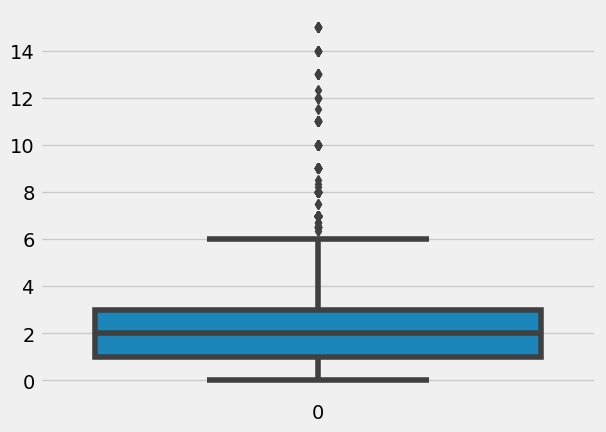

In [314]:
# Rechecking box plot
sns.boxplot(Lead_df1["Page Views Per Visit"])
plt.show()

In [315]:
# Checking max value
Lead_df1["Page Views Per Visit"].describe()

count    9240.000000
mean        2.351867
std         2.069082
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: Page Views Per Visit, dtype: float64

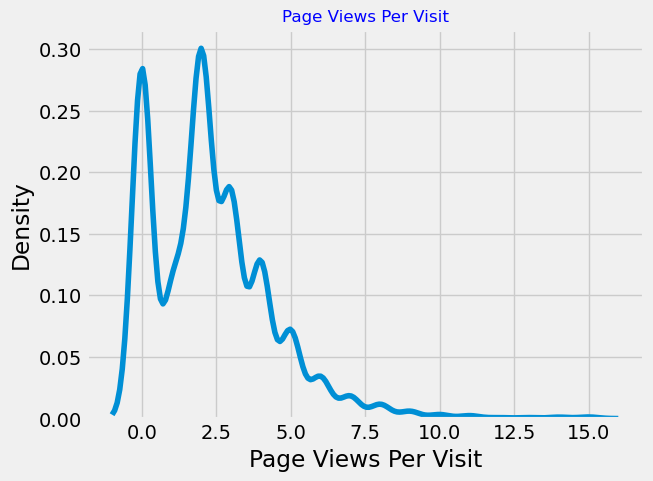

In [316]:
# Checking the kde plot  again
sns.kdeplot(data=Lead_df1["Page Views Per Visit"])
plt.title("Page Views Per Visit",fontdict={"fontsize":12,"fontweight":10,"color":"blue"})
plt.show()

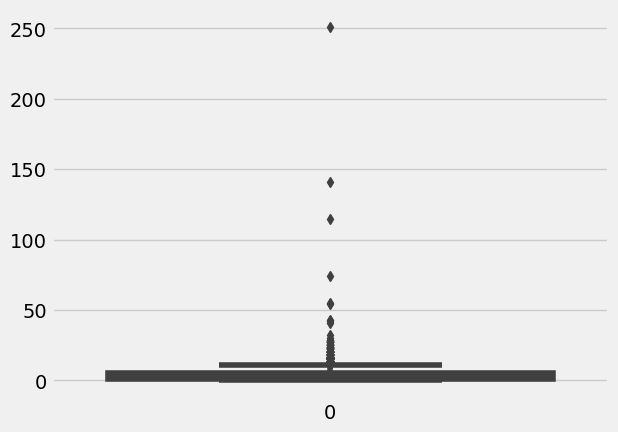

In [317]:
# Plotting box plot for TotalVisits column
sns.boxplot(Lead_df1["TotalVisits"])
plt.show()

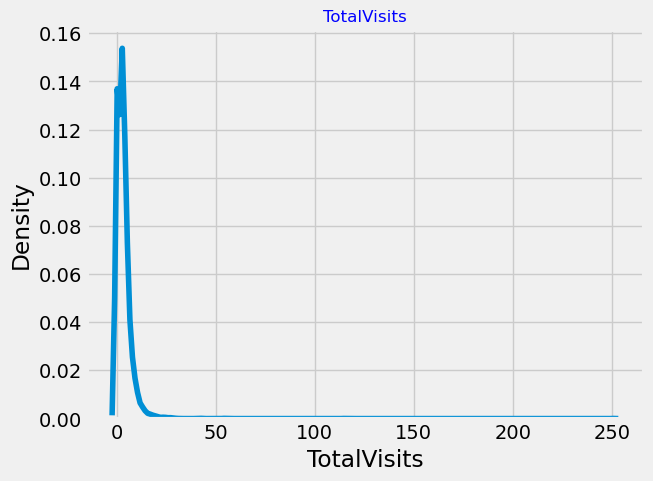

In [318]:
# Checking the kde plot 
sns.kdeplot(data=Lead_df1["TotalVisits"])
plt.title("TotalVisits",fontdict={"fontsize":12,"fontweight":10,"color":"blue"})
plt.show()

In [319]:
# Checking various quantile values of Page Views Per Visit
Lead_df1["TotalVisits"].quantile([0.5,0.7,0.9,0.95,0.99,0.999])

0.500     3.000
0.700     4.000
0.900     7.000
0.950    10.000
0.990    17.000
0.999    31.522
Name: TotalVisits, dtype: float64

In [320]:
# Filtering out data above 99.9% value and checking the median
cond_total_visit=Lead_df1[Lead_df1["TotalVisits"] > 31.522]
print(cond_total_visit.shape)
print(int(cond_total_visit["TotalVisits"].median()))

(10, 26)
54


In [321]:
# capping the outliers to median of values above 99.9% 
Lead_df1.loc[(Lead_df1["TotalVisits"]>31.522),"TotalVisits"]=54

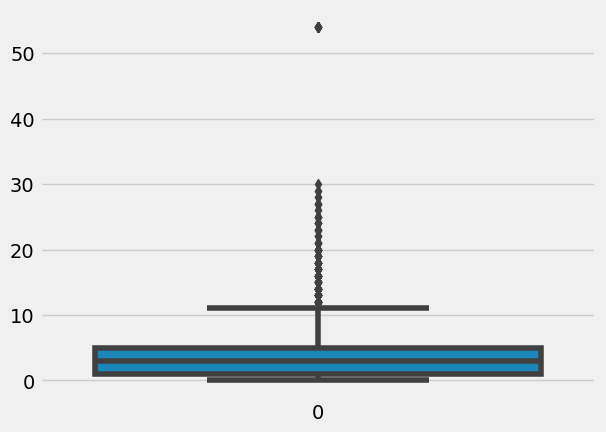

In [322]:
# Plotting box plot for Total Visits column
sns.boxplot(Lead_df1["TotalVisits"])
plt.show()

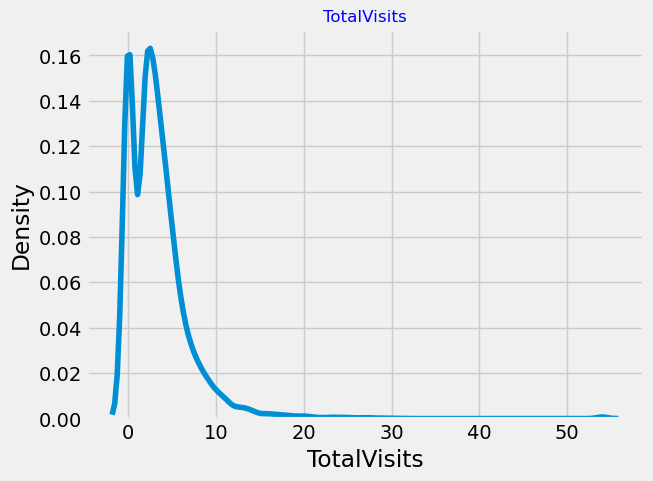

In [323]:
# Checking the kde plot again
sns.kdeplot(data=Lead_df1["TotalVisits"])
plt.title("TotalVisits",fontdict={"fontsize":12,"fontweight":10,"color":"blue"})
plt.show()

In [324]:
# Checking the max values of numerical columns
Lead_df1.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.405303,487.698268,2.351867
std,3.779608,548.021466,2.069082
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
max,54.000000,2272.000000,15.000000


In [325]:
# Checking column names of dataset
Lead_df1.columns

Index(['Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Specialization_new',
       'What is your current occupation 1',
       'What matters most to you in choosing a course new', 'Tags_new',
       'Lead Source new', 'Last Activity new', 'Lead Origin new',
       'Last Notable Activity new'],
      dtype='object')

In [326]:
# Bifurcating categorical, numerical and target columns
cat_cols=['Do Not Email', 'Do Not Call', 'Search','Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque','A free copy of Mastering The Interview',
       'Specialization_new','What is your current occupation 1','What matters most to you in choosing a course new', 'Tags_new',
       'Lead Source new', 'Last Activity new', 'Lead Origin new','Last Notable Activity new']
num_cols=['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']
target_cols=["Converted"]

In [327]:
len(cat_cols)+len(num_cols)+len(target_cols)

26

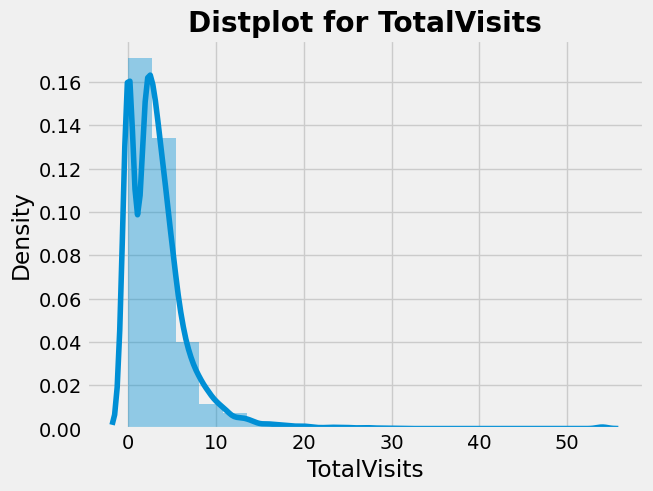

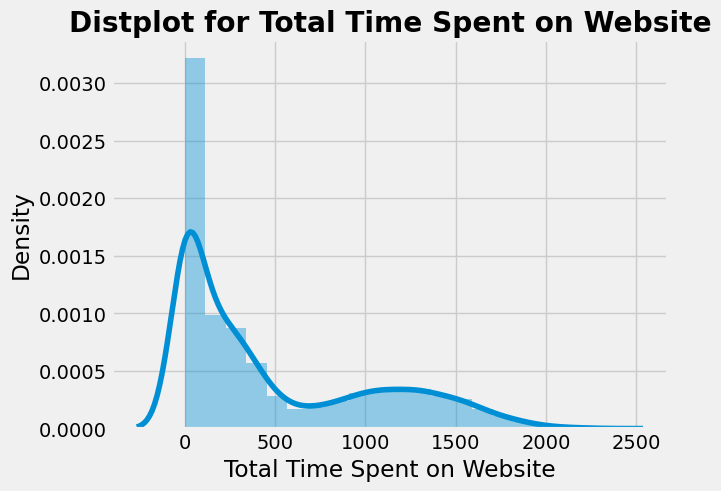

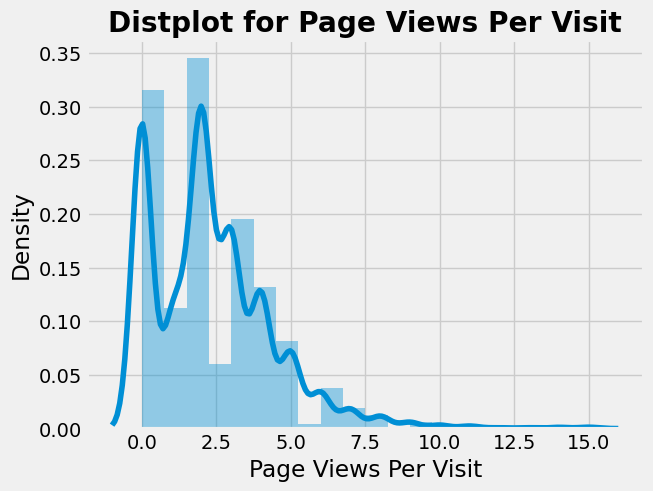

In [328]:
# Univariate analysis of contineous columns
for i in num_cols:
    plt.style.use("fivethirtyeight")
    sns.distplot(Lead_df1[i], bins=20)
    plt.xlabel(i)
    plt.title("Distplot for" +" "+i, fontweight="heavy")
    
    plt.show()

Do Not Email


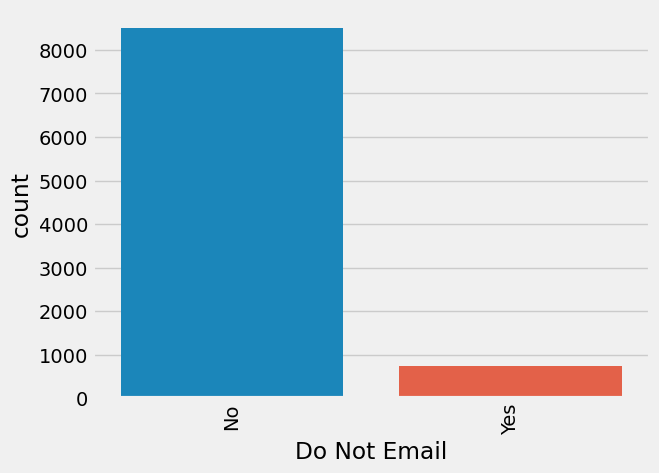

Do Not Call


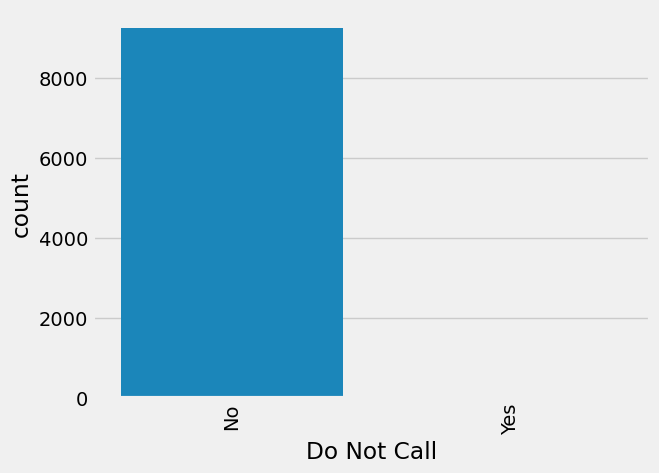

Search


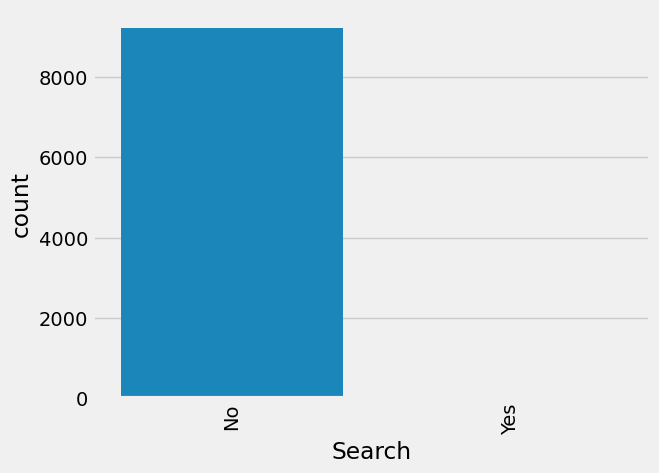

Magazine


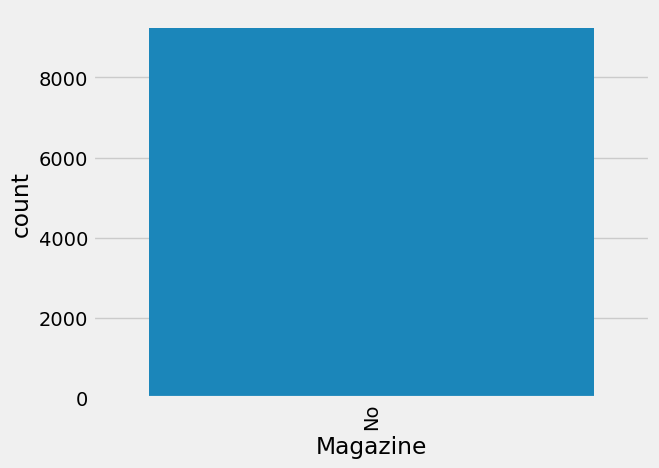

Newspaper Article


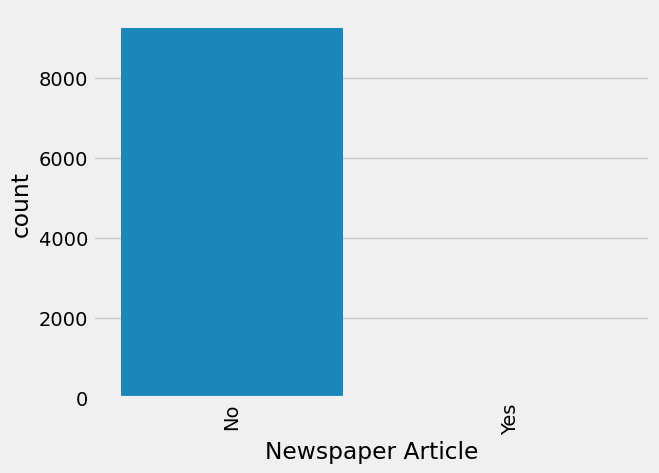

X Education Forums


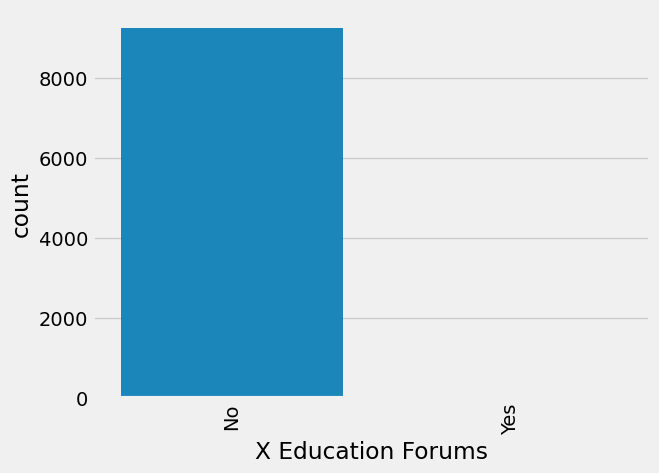

Newspaper


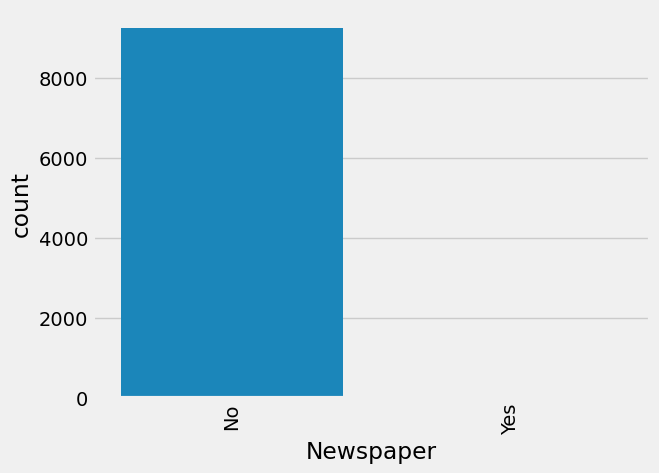

Digital Advertisement


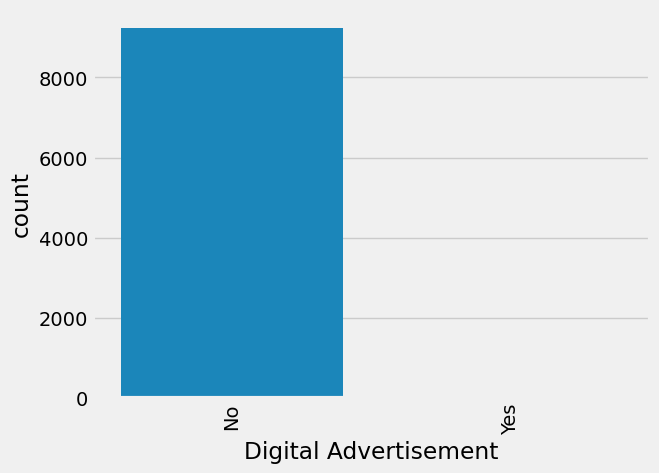

Through Recommendations


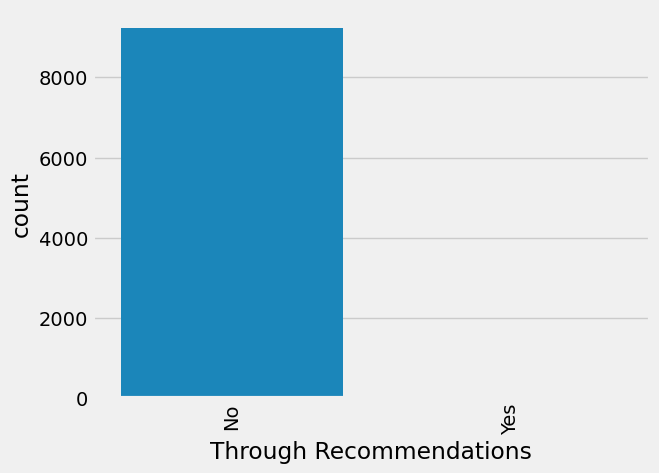

Receive More Updates About Our Courses


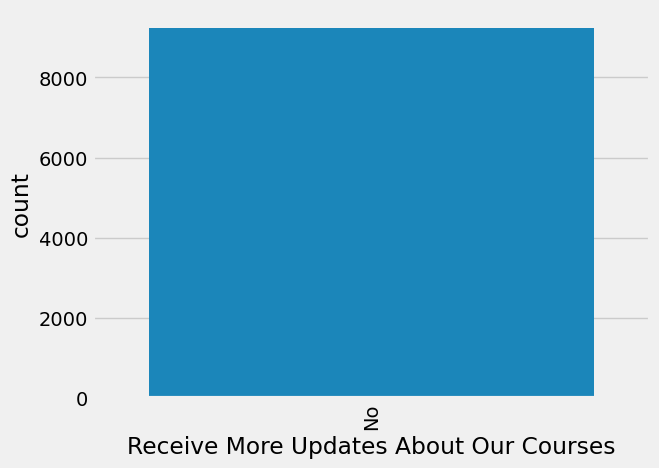

Update me on Supply Chain Content


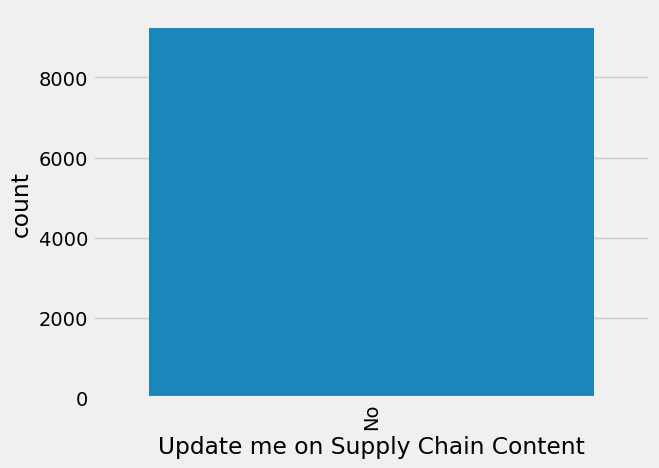

Get updates on DM Content


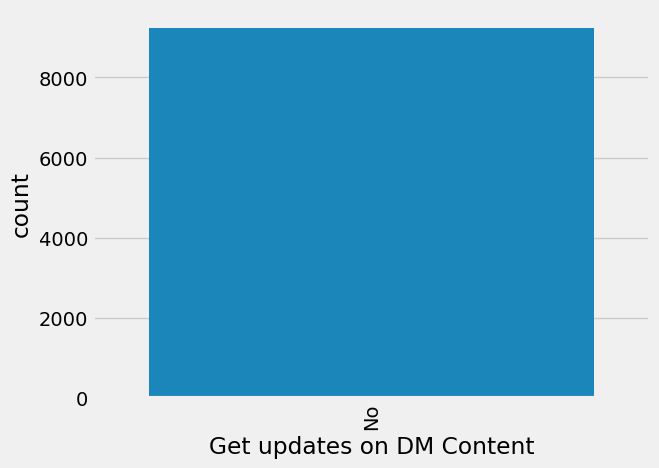

I agree to pay the amount through cheque


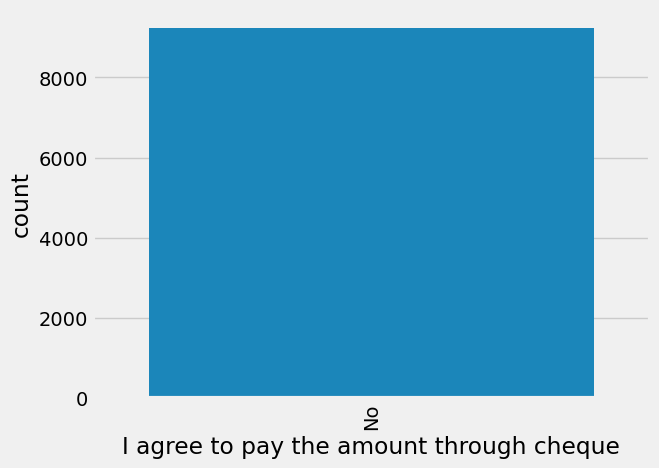

A free copy of Mastering The Interview


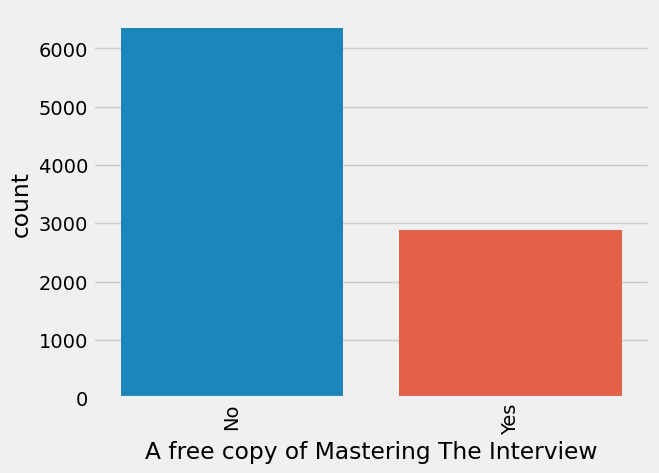

Specialization_new


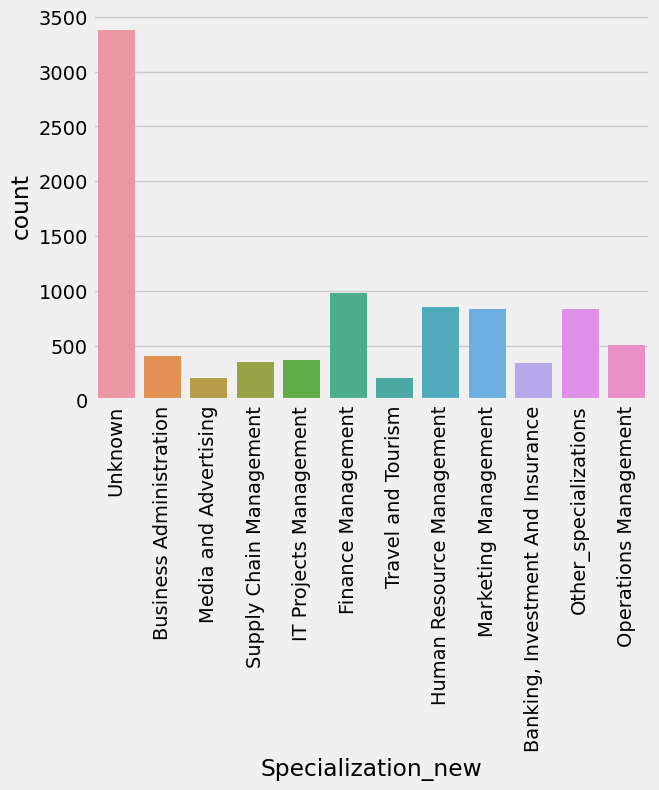

What is your current occupation 1


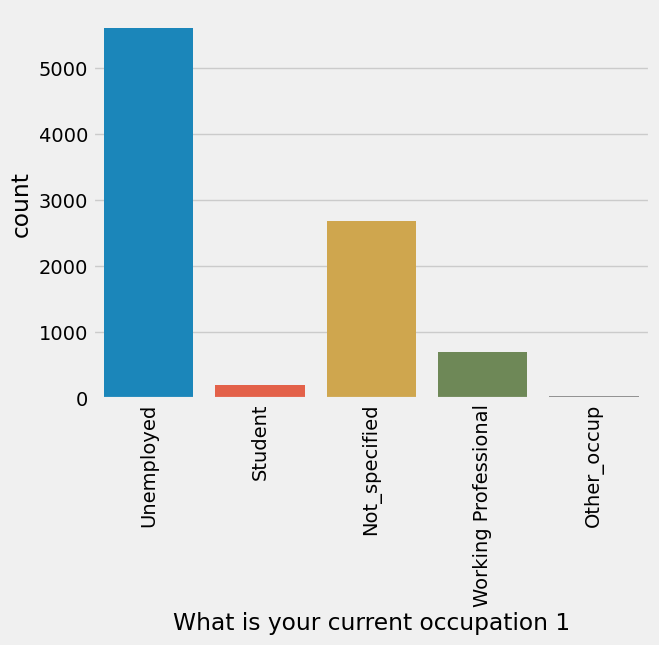

What matters most to you in choosing a course new


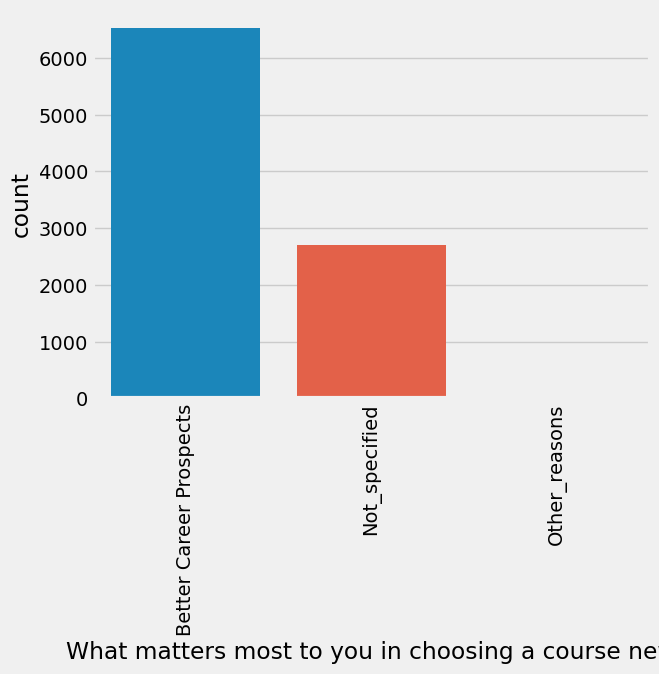

Tags_new


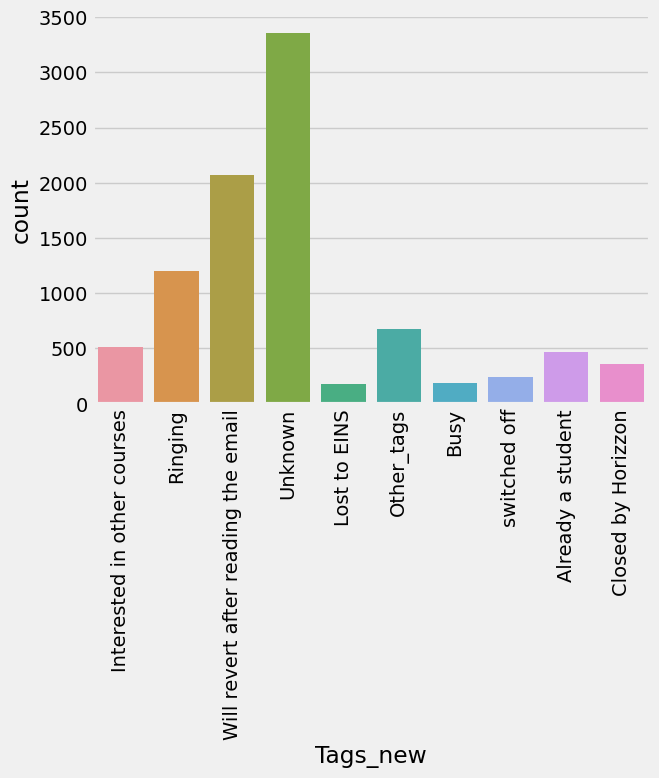

Lead Source new


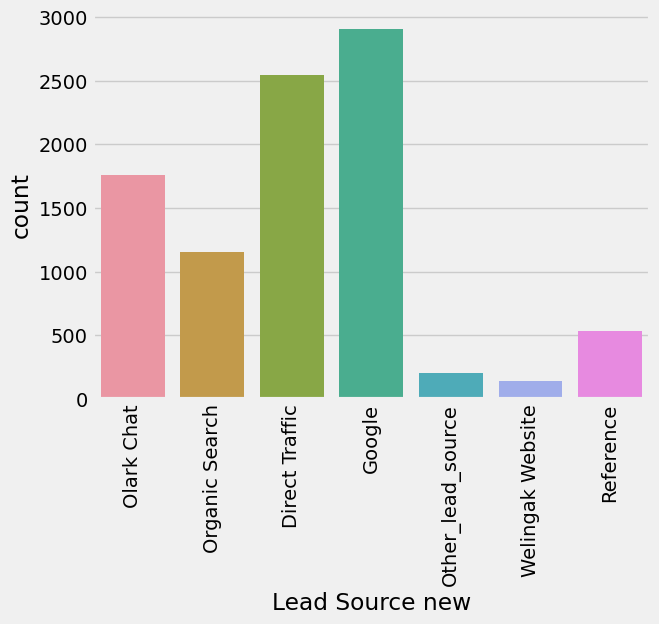

Last Activity new


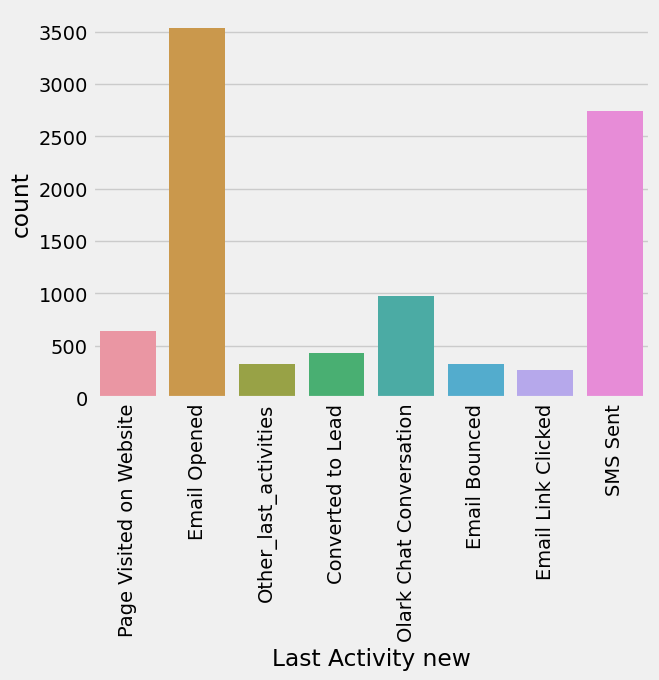

Lead Origin new


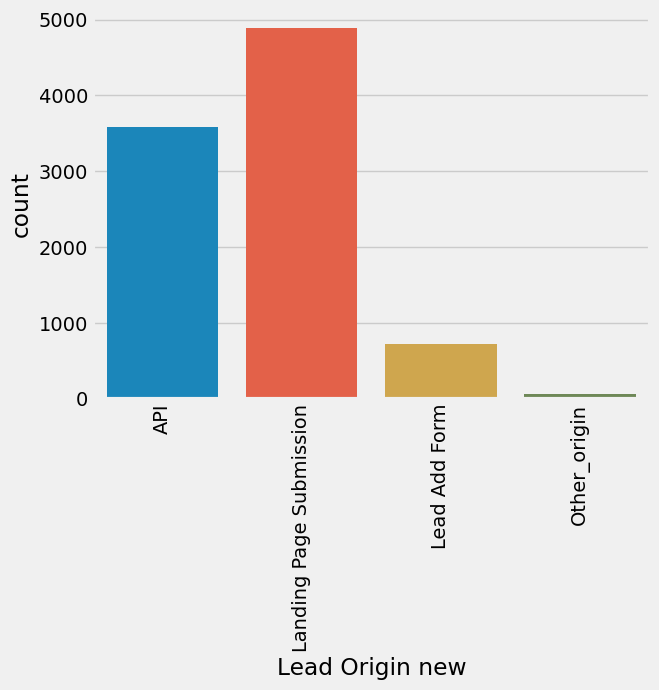

Last Notable Activity new


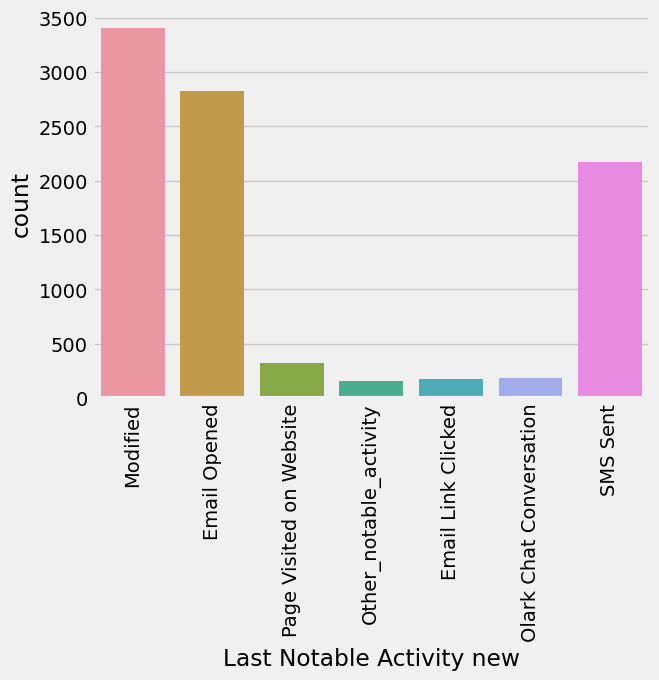

In [329]:
# Univariate analysis of categorical columns
for i in cat_cols:
    print("\033[1m" + i + "\033[0m")
    sns.countplot(x=Lead_df1[i])
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

Do Not Email


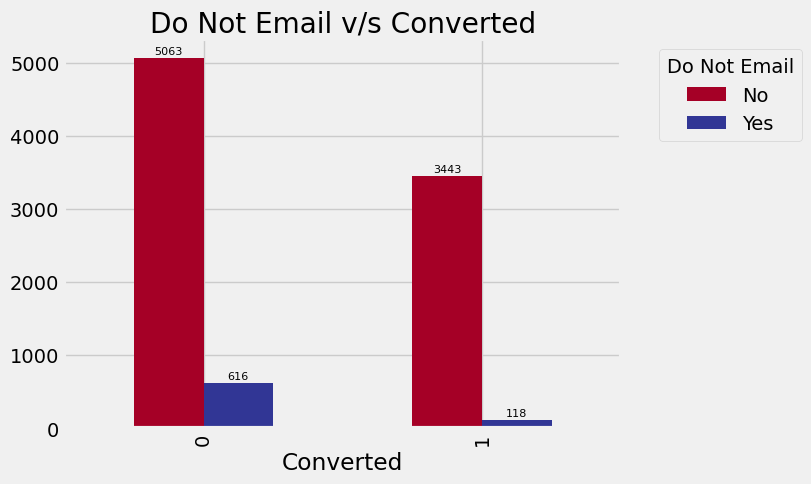

Do Not Call


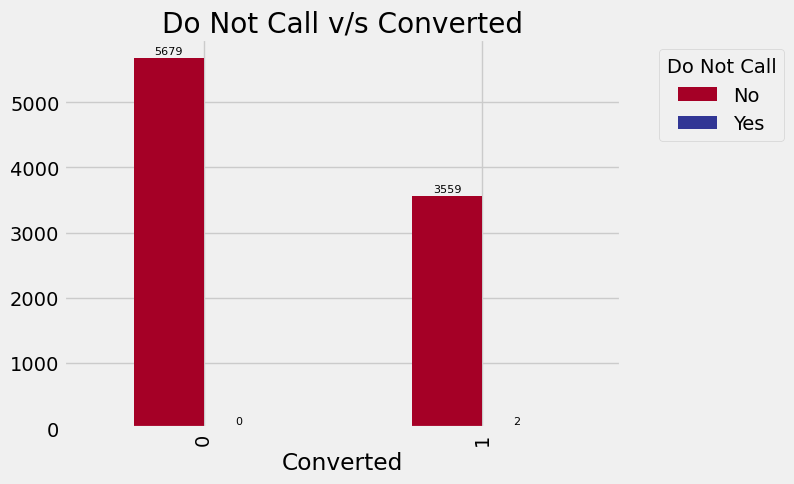

Search


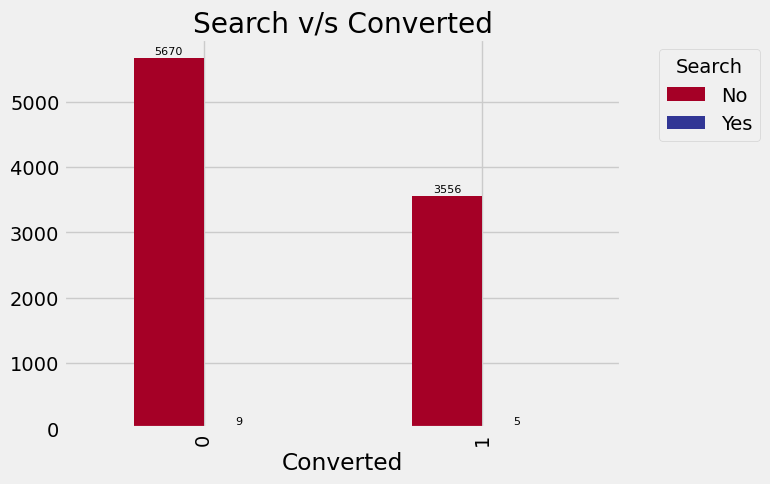

Magazine


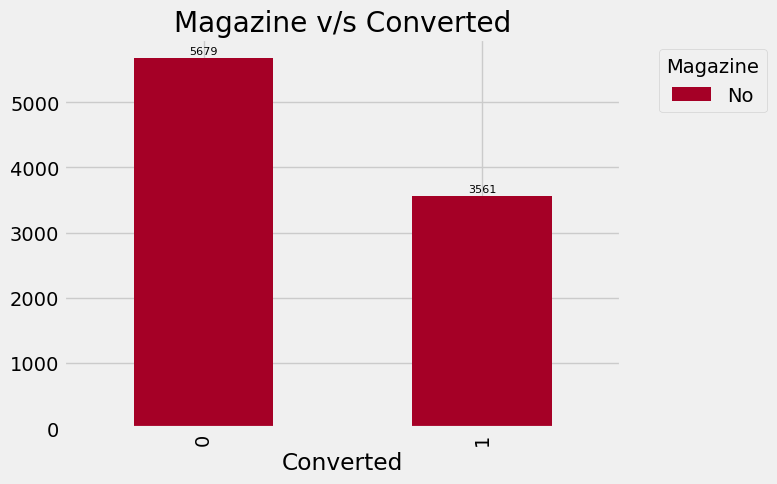

Newspaper Article


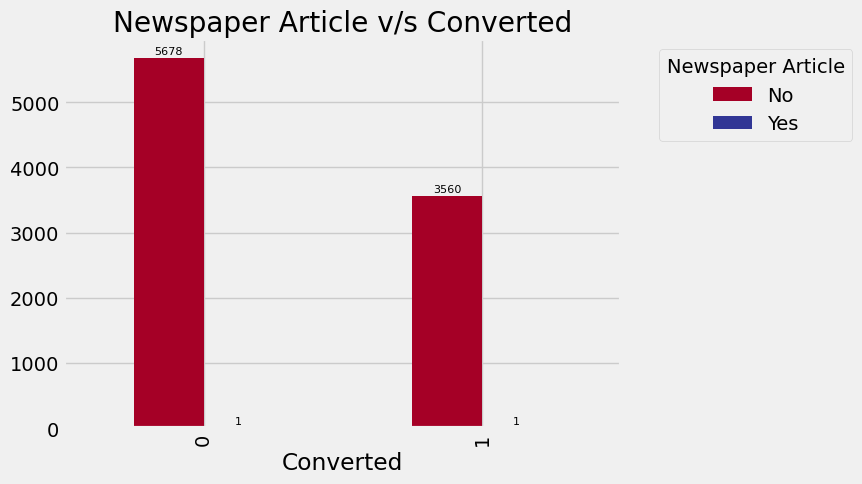

X Education Forums


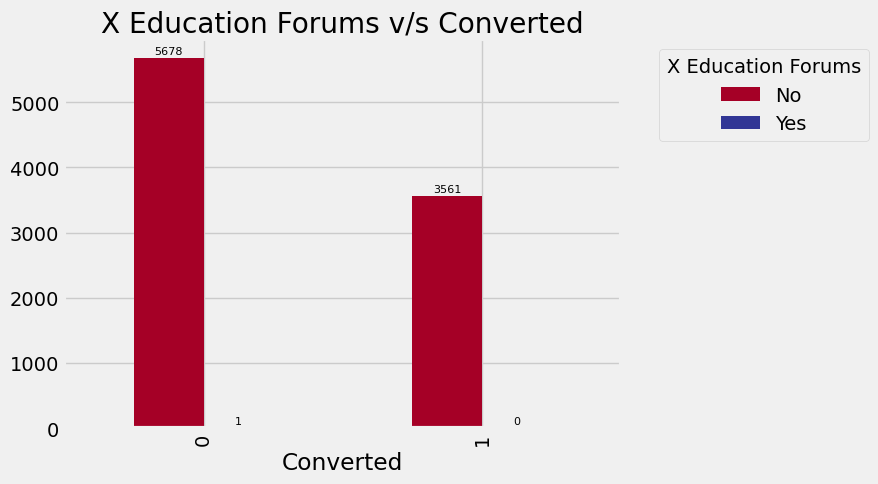

Newspaper


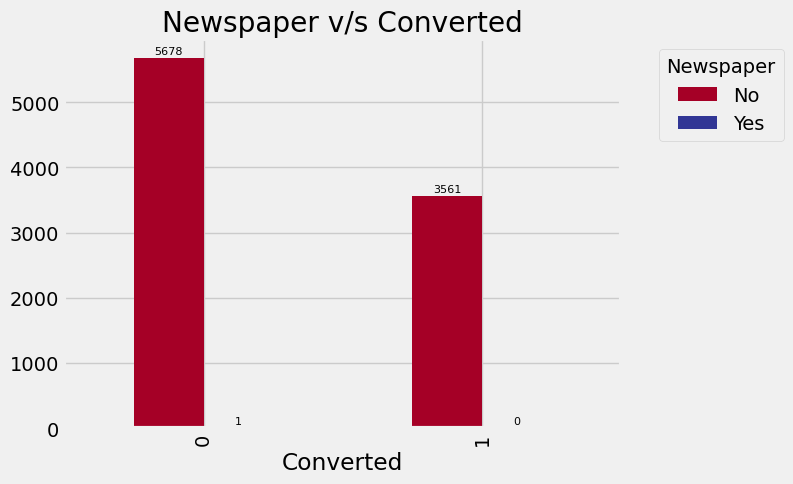

Digital Advertisement


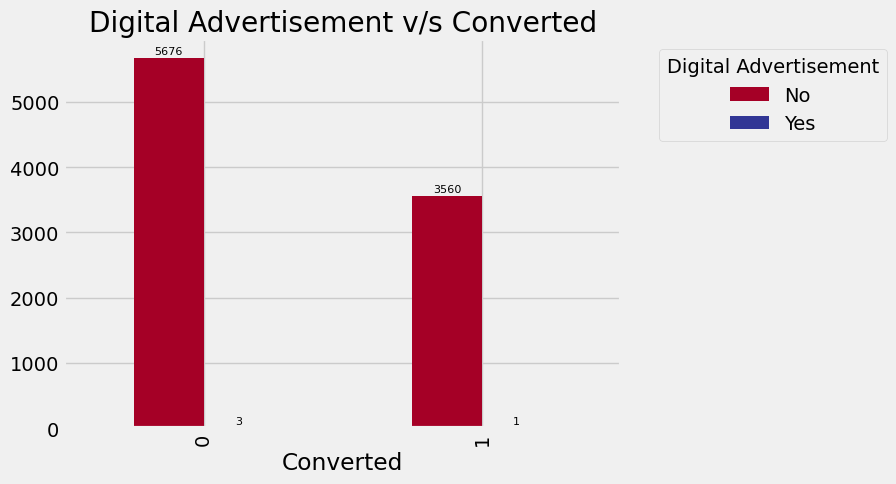

Through Recommendations


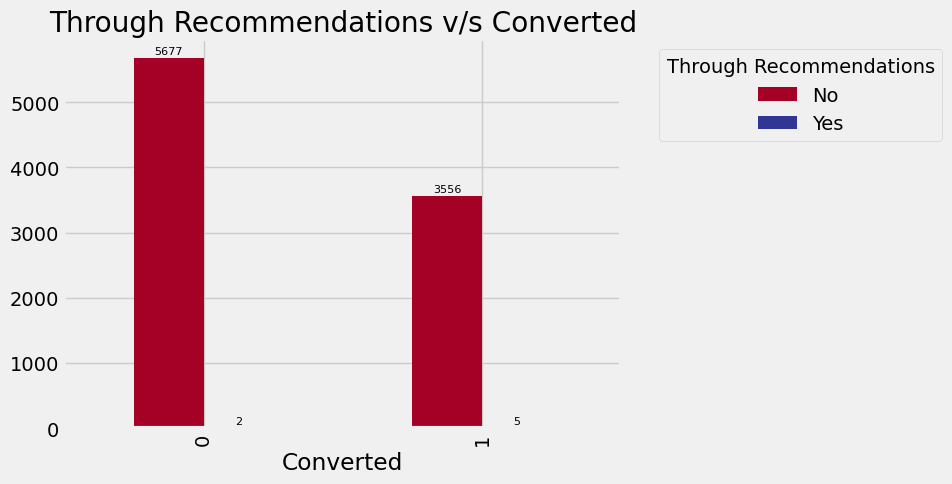

Receive More Updates About Our Courses


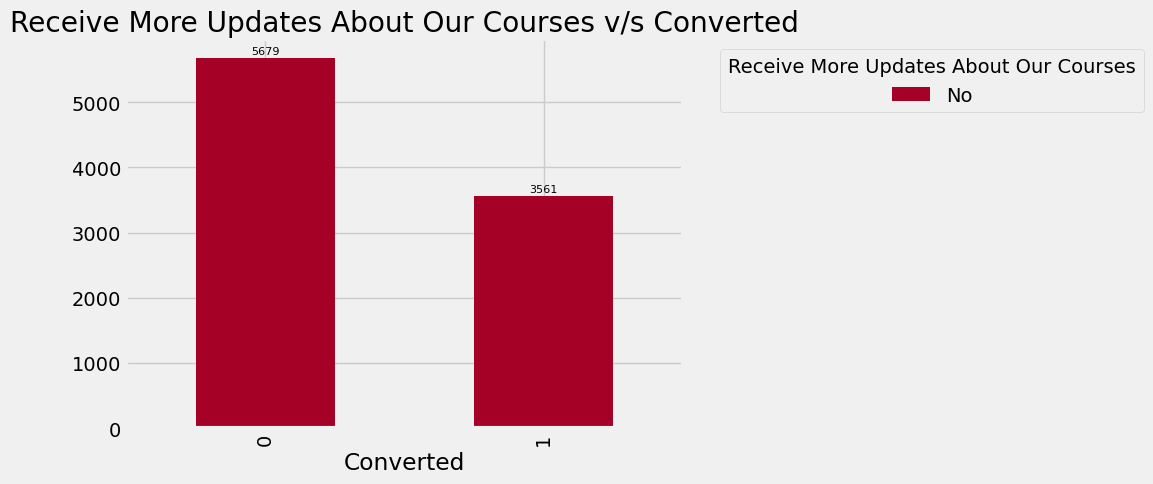

Update me on Supply Chain Content


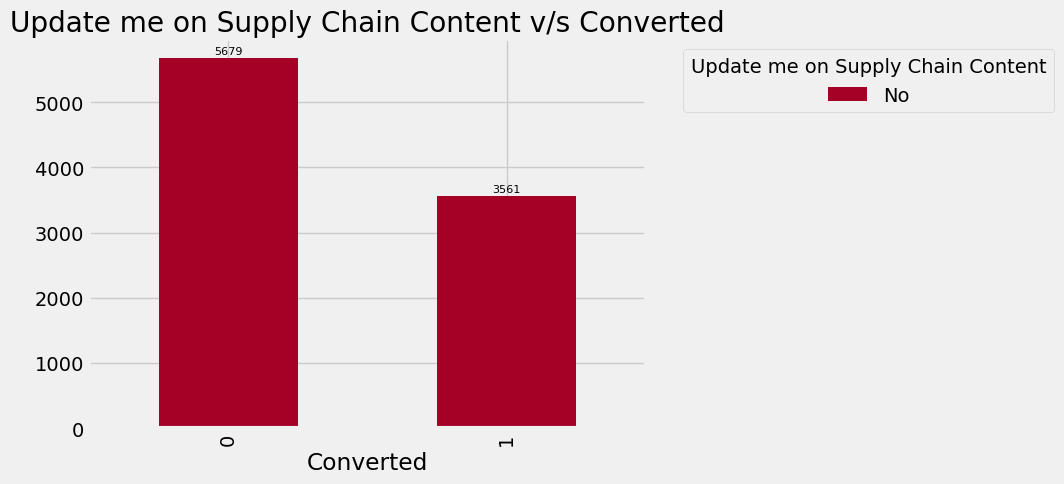

Get updates on DM Content


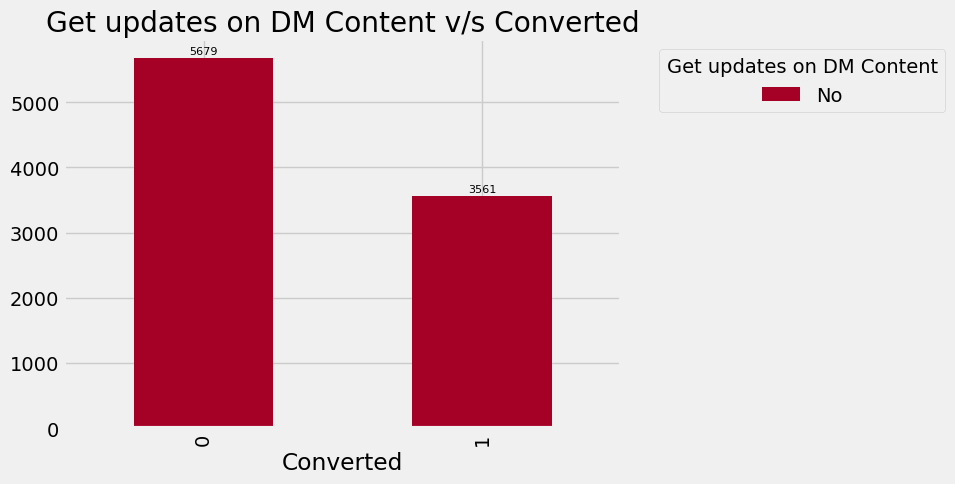

I agree to pay the amount through cheque


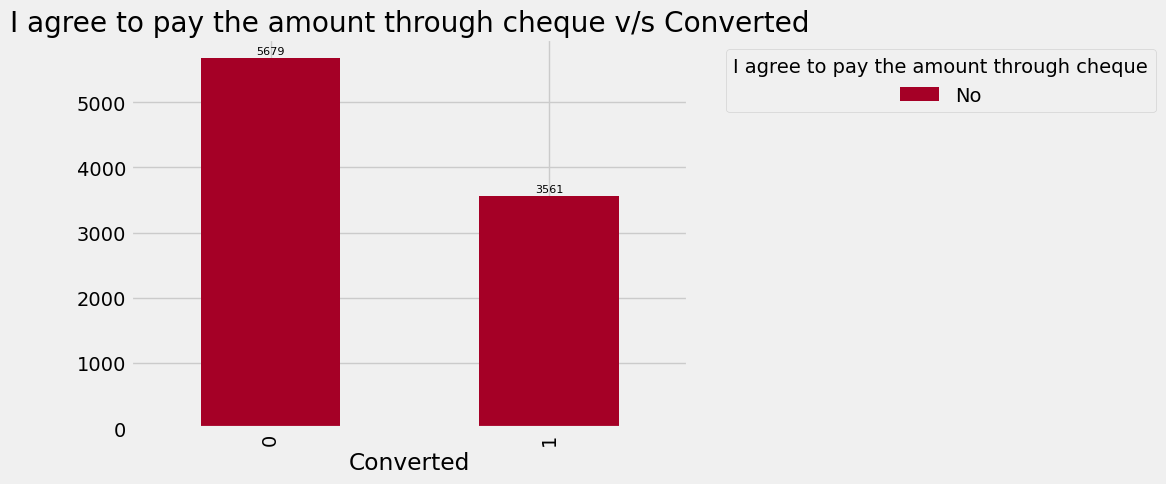

A free copy of Mastering The Interview


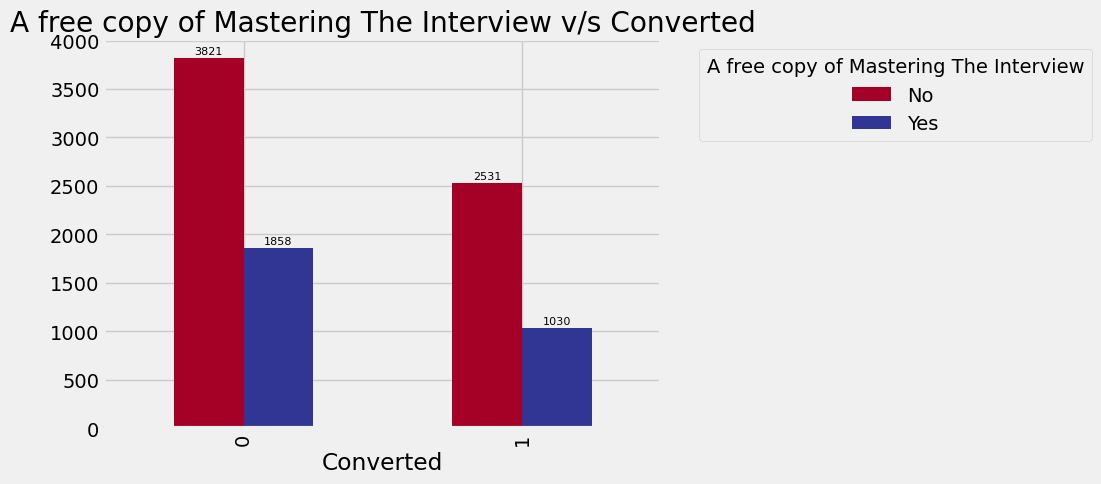

Specialization_new


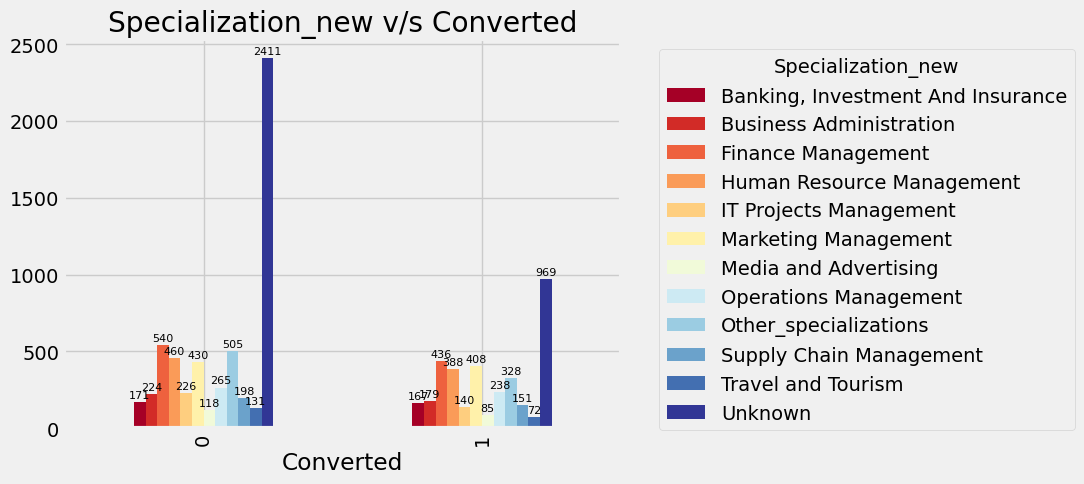

What is your current occupation 1


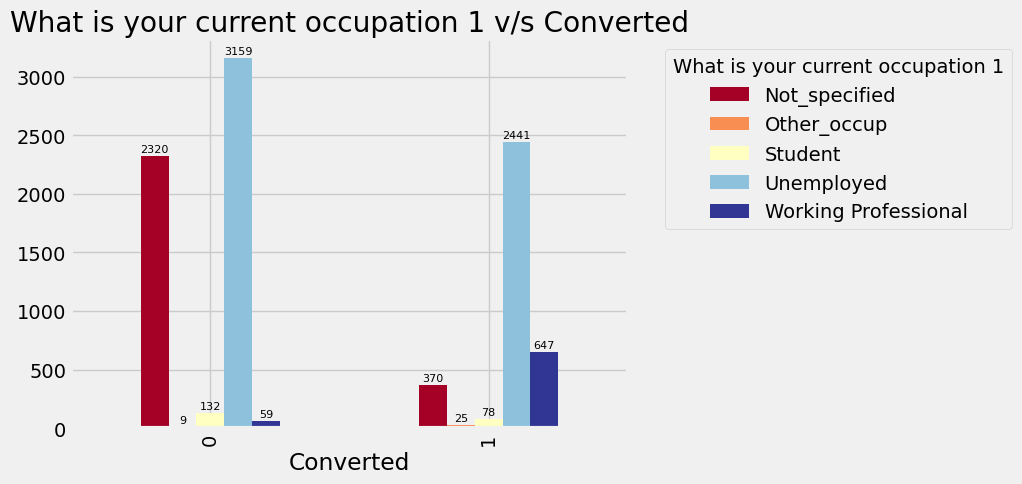

What matters most to you in choosing a course new


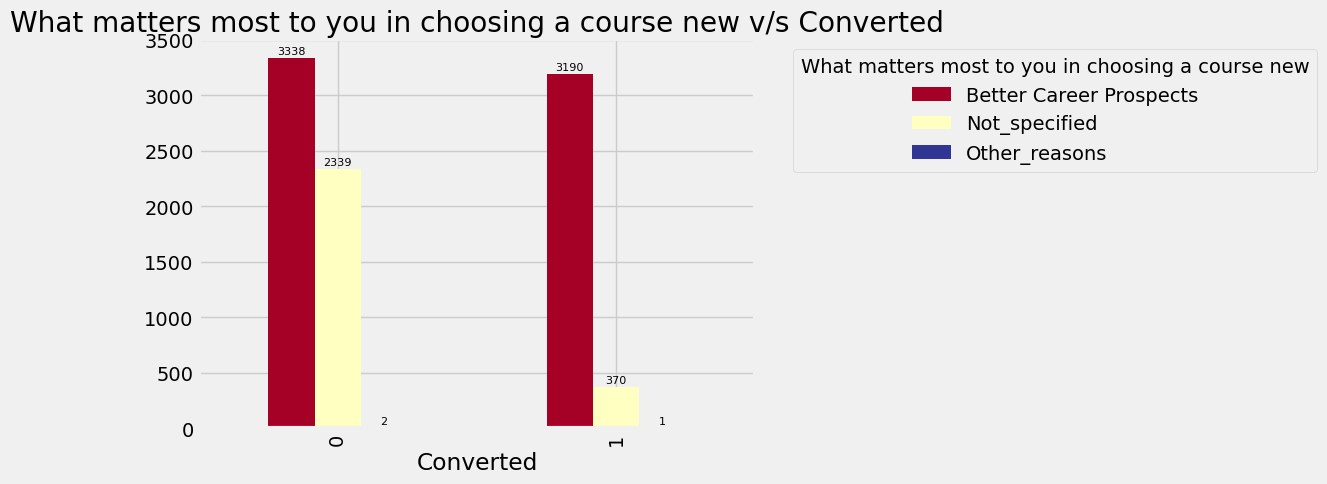

Tags_new


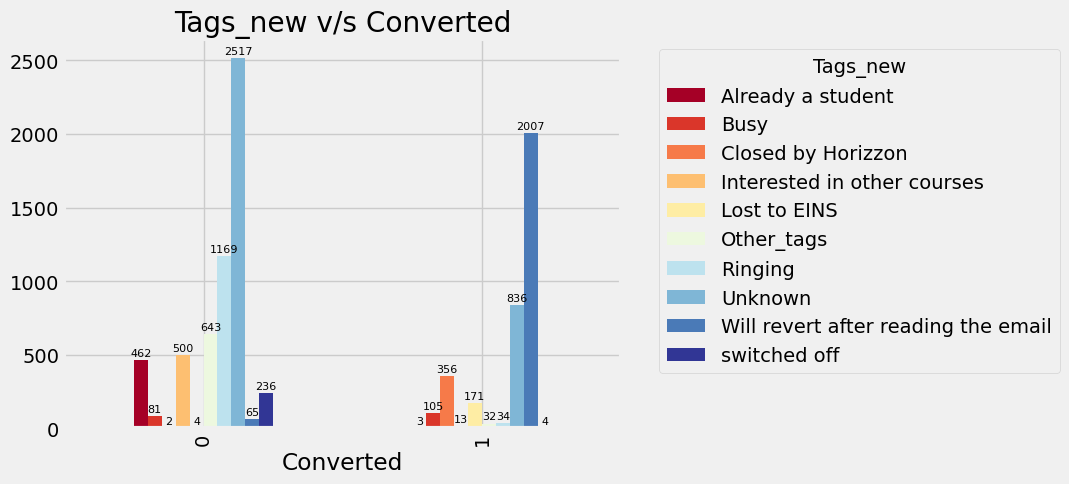

Lead Source new


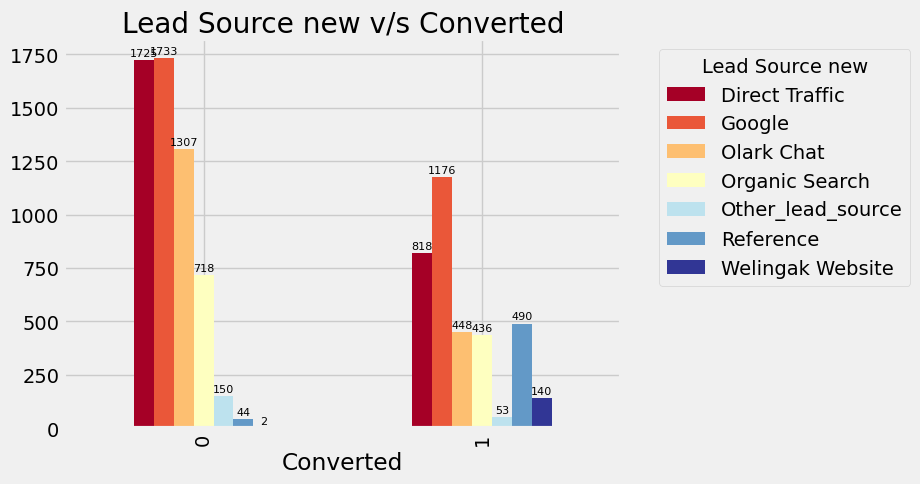

Last Activity new


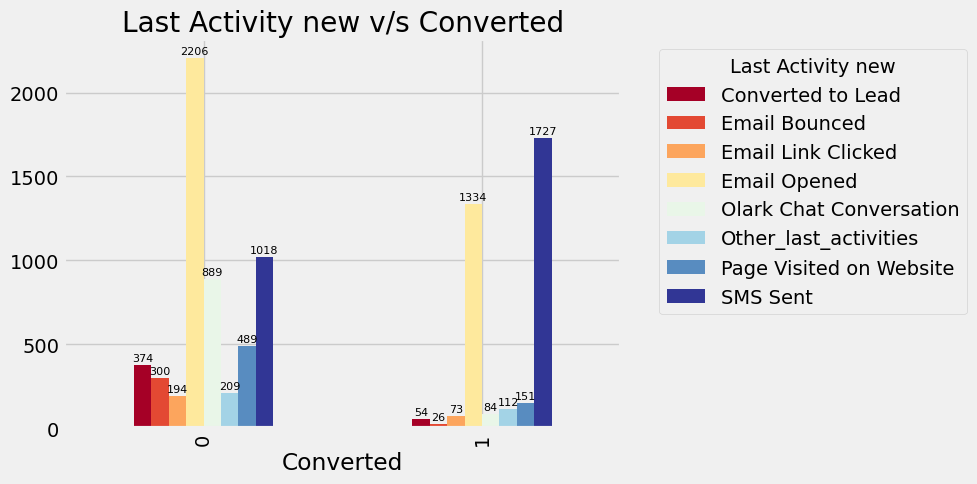

Lead Origin new


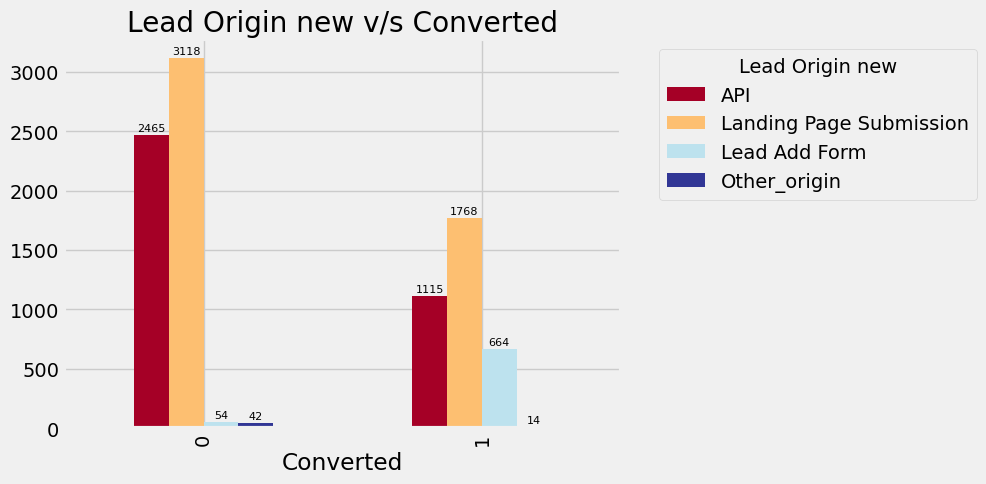

Last Notable Activity new


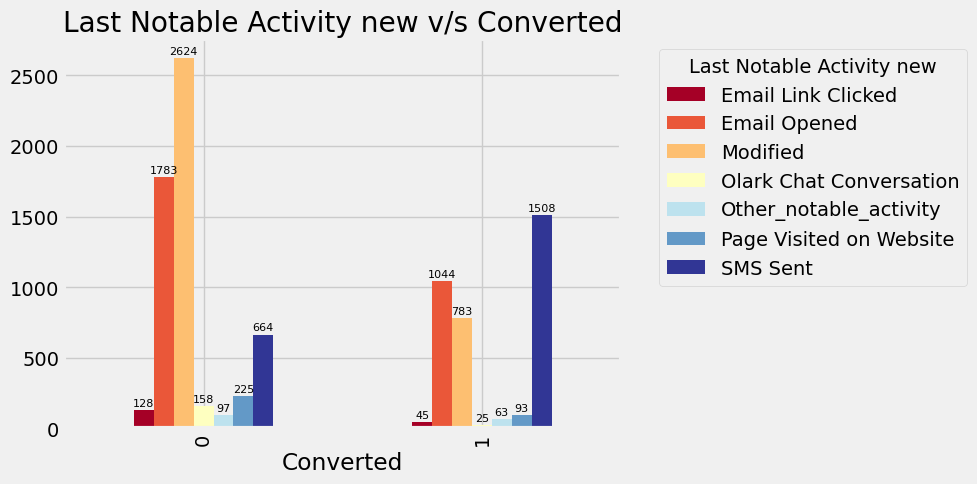

In [330]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'cat_cols' and 'leads1' are defined
for i in cat_cols:
    print("\033[1m" + i + "\033[0m")
    cross_table = pd.crosstab(Lead_df1["Converted"], Lead_df1[i])
    ax = cross_table.plot(kind='bar', cmap='RdYlBu')
    plt.title(f"{i} v/s Converted")
    plt.legend(title=i, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Add counts on the bars
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points',
                    fontsize=8)
    
    plt.show()

In [331]:
Lead_df1.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque'],axis=1, inplace=True)

TotalVisits


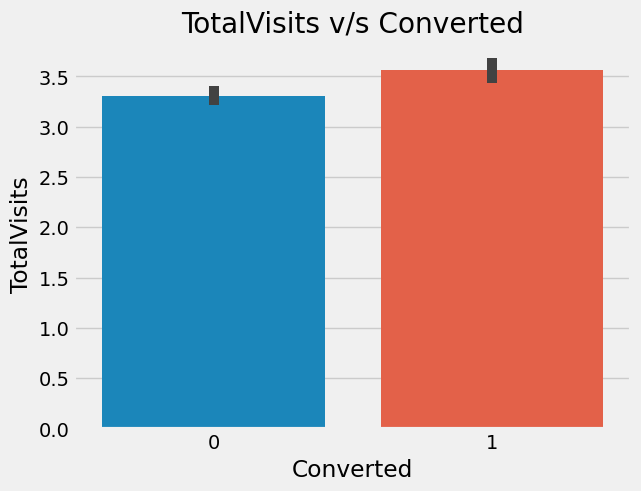

Total Time Spent on Website


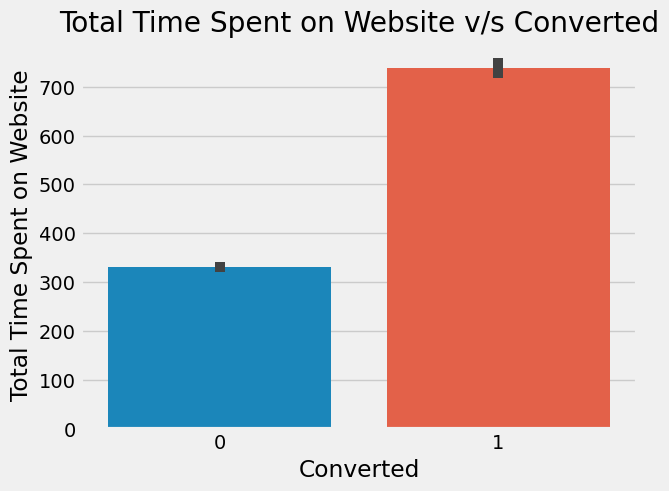

Page Views Per Visit


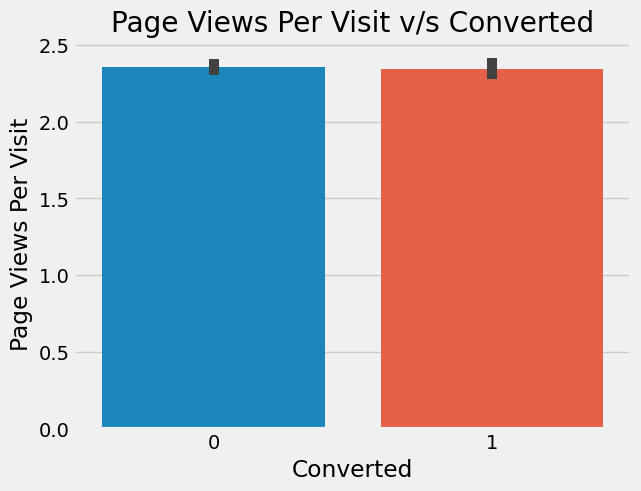

In [332]:
for i in num_cols:
    print("\033[1m" + i + "\033[0m")
    sns.barplot(Lead_df1,x="Converted",y=i)
    plt.title(f"{i} v/s Converted")
    plt.show()

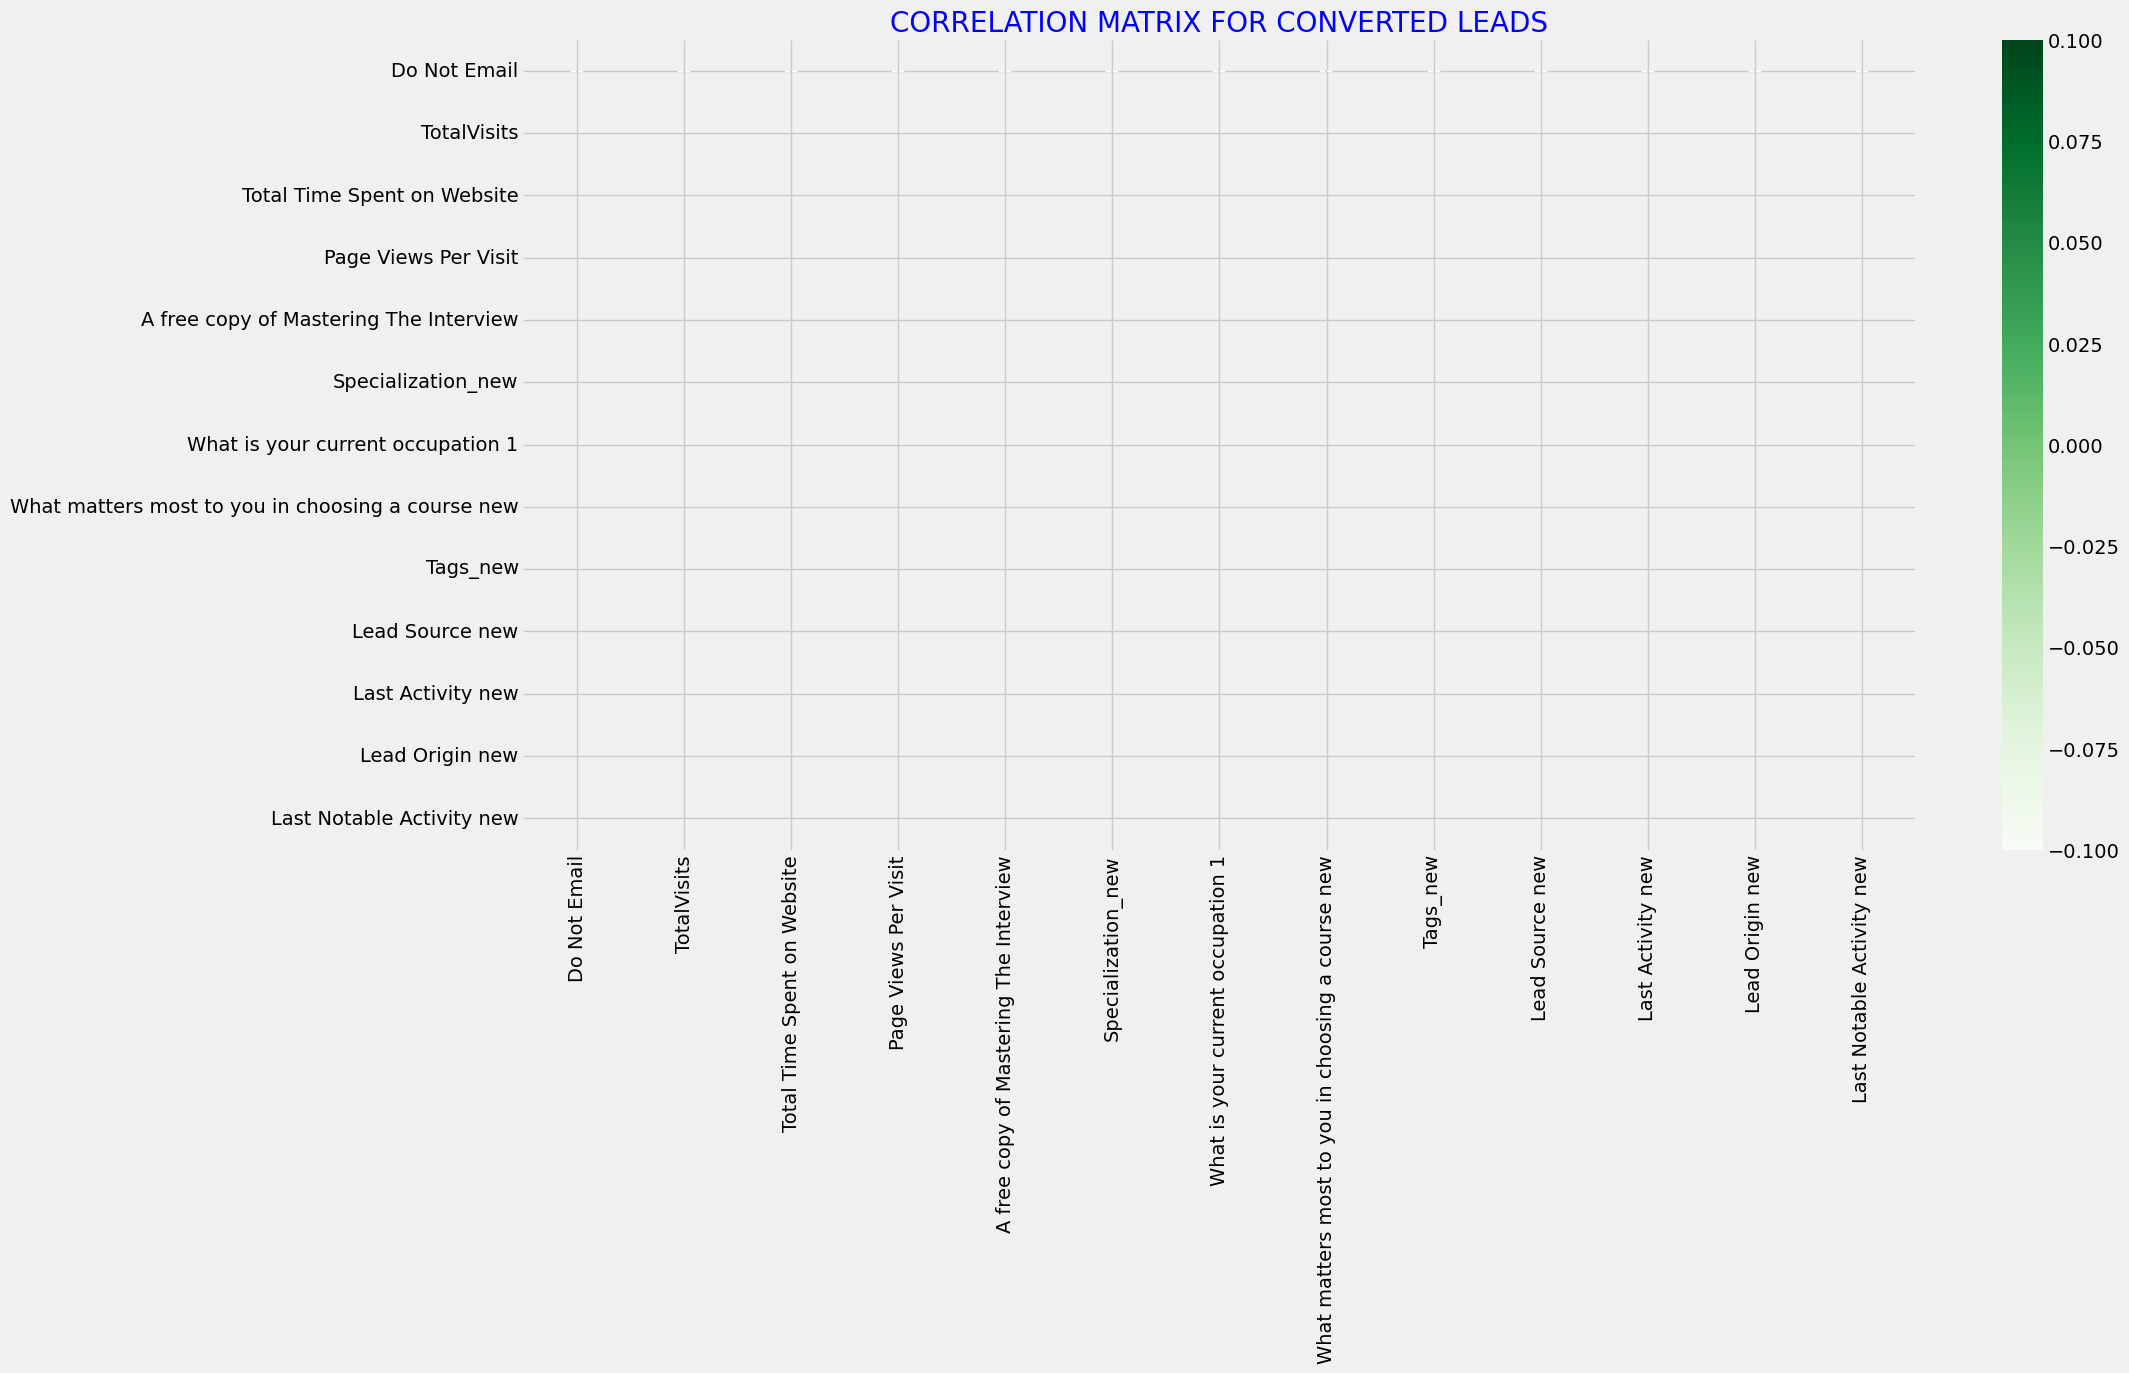

In [333]:
# Plotting heat map for converted leads
plt.figure(figsize=(20,10))
# Filtering out leads data with converted leads
leads_conv=Lead_df1[Lead_df1["Converted"]==1]
leads_conv.drop("Converted",axis=1,inplace=True)
sns.heatmap(leads_conv.corr(),annot=True,cmap="Greens")
plt.title("CORRELATION MATRIX FOR CONVERTED LEADS",fontdict={"fontsize":20,"fontweight":10,"color":"blue"})
plt.show()

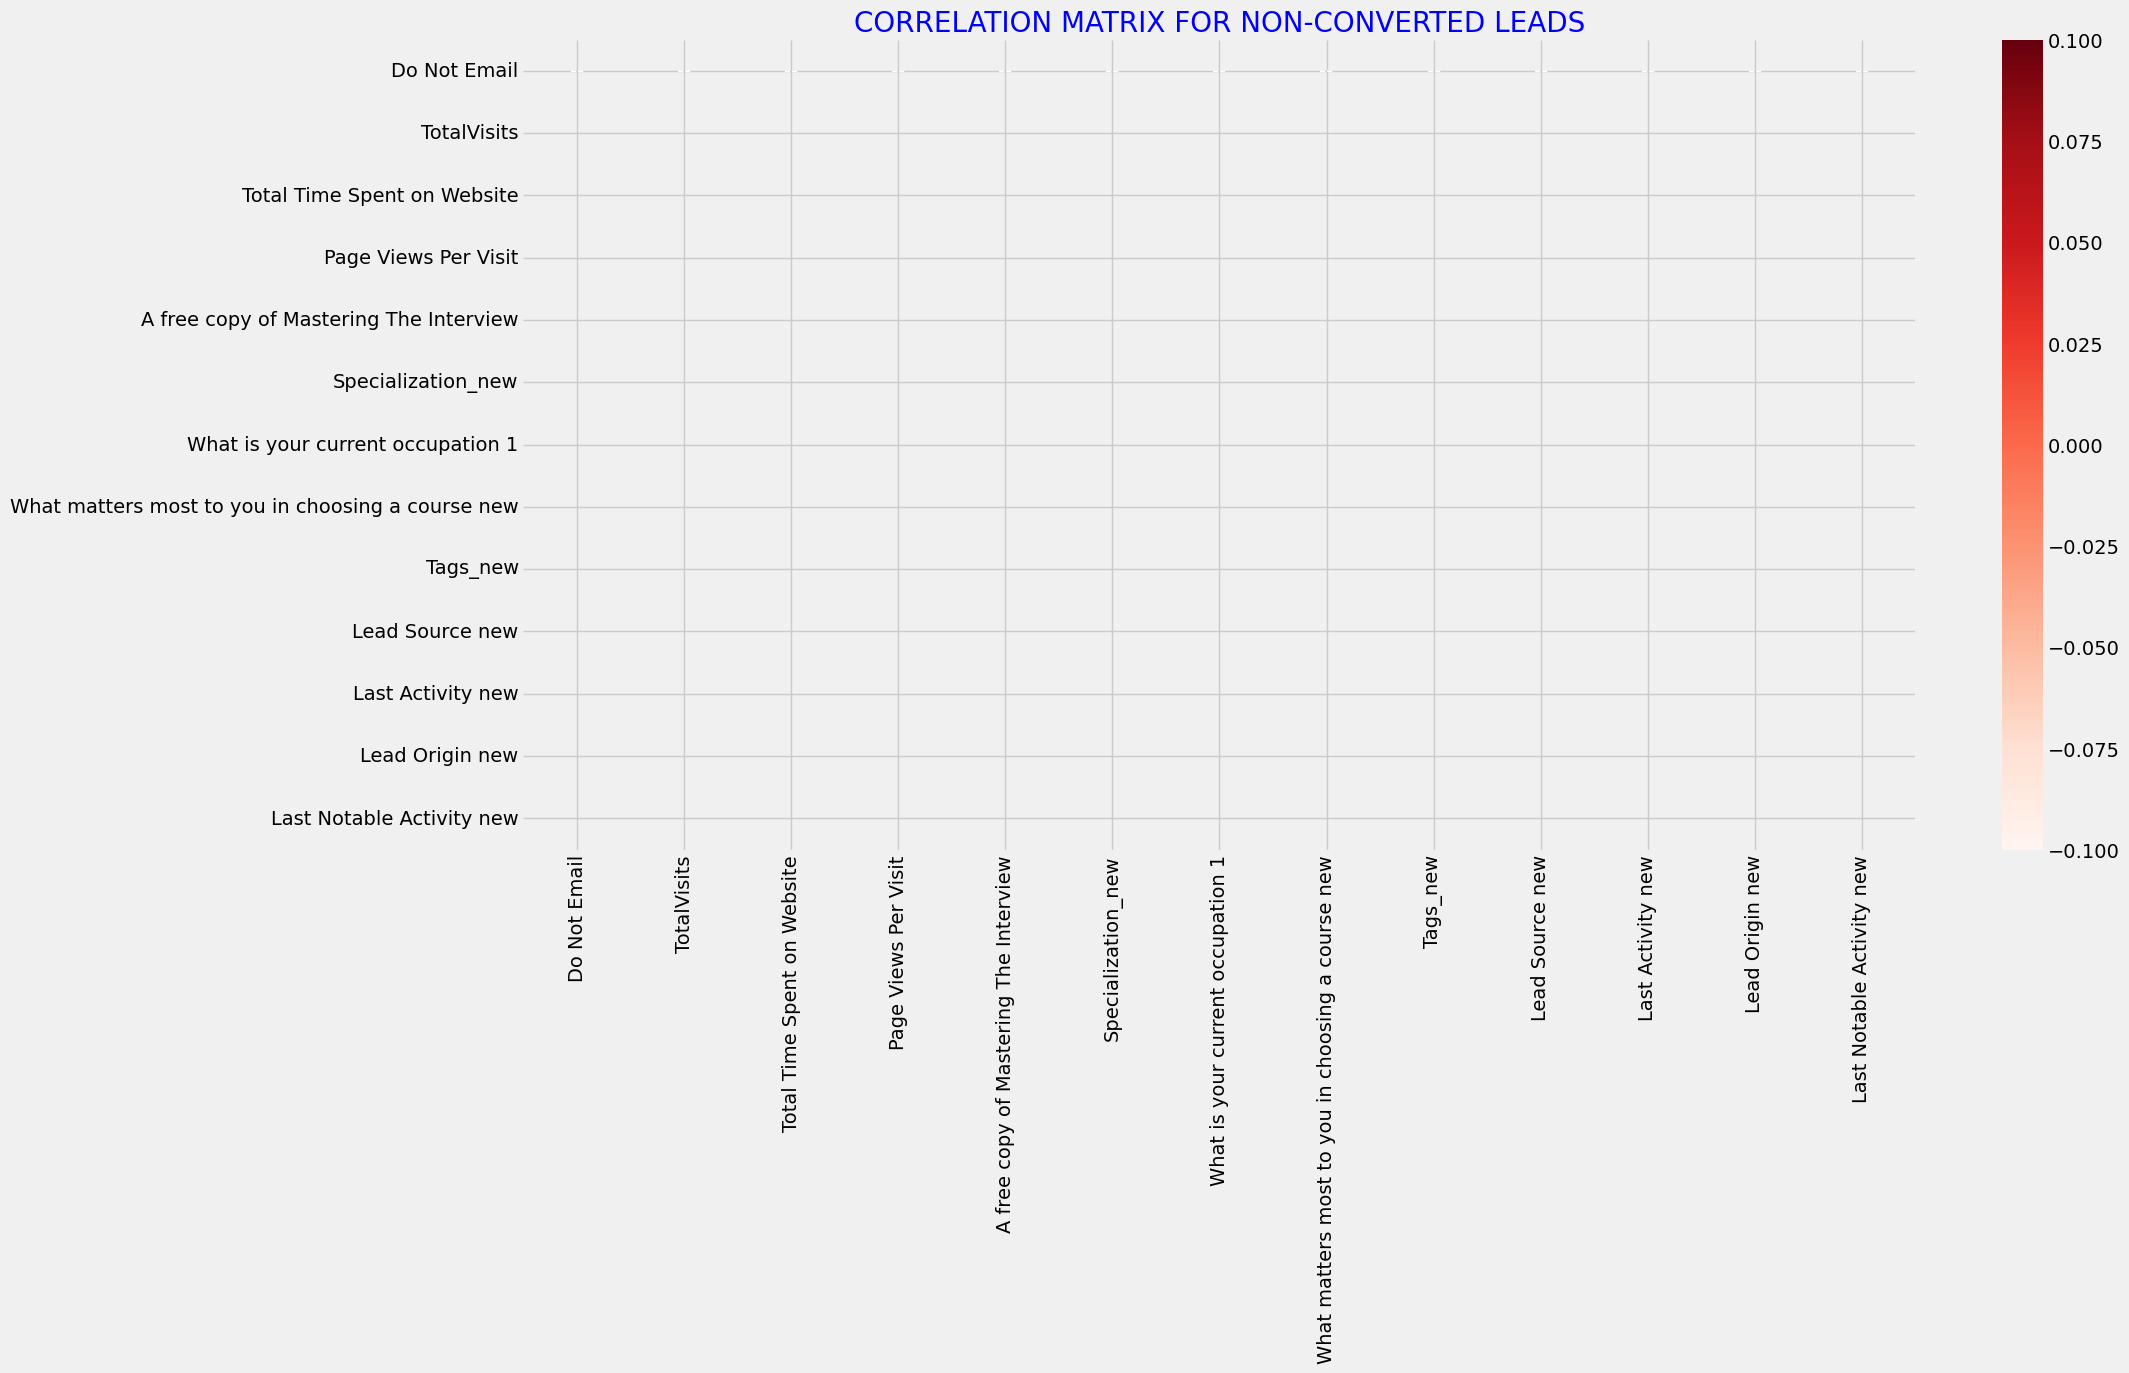

In [334]:
# Plotting heat map for non-converted leads
plt.figure(figsize=(20,10))
# Filtering out leads data with converted leads
leads_no_conv=Lead_df1[Lead_df1["Converted"]==0]
leads_no_conv.drop("Converted",axis=1,inplace=True)
sns.heatmap(leads_no_conv.corr(),annot=True,cmap="Reds")
plt.title("CORRELATION MATRIX FOR NON-CONVERTED LEADS",fontdict={"fontsize":20,"fontweight":10,"color":"blue"})
plt.show()

In [335]:
## Checking for Data Imbalance
# Calculating the percentage of Converted leads
Lead_df1["Converted"].value_counts(normalize=True)*100

Converted
0    61.461039
1    38.538961
Name: proportion, dtype: float64

In [336]:
# Checking the shape of dataset again
Lead_df1.shape

(9240, 14)

In [337]:
# Mapping Yes to 1 and No to 0 for Binary categorical columns
# List of variables to map

varlist =  ["Do Not Email","A free copy of Mastering The Interview"]

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
Lead_df1[varlist] = Lead_df1[varlist].apply(binary_map)

In [338]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(Lead_df1[["Lead Origin new","Last Activity new","Last Notable Activity new","Lead Source new"]], drop_first=True)

# Adding the results to the master dataframe
Lead_df1 = pd.concat([Lead_df1, dummy1], axis=1)

In [339]:
# Checking shape of dataset
Lead_df1.shape

(9240, 36)

In [340]:
# Creating dummy variables for the variable 'Specialization'
spec= pd.get_dummies(Lead_df1["Specialization_new"], prefix='Specialization')
# Dropping Specialization_unknown column
spec1 = spec.drop(['Specialization_Unknown'],axis=1)
#Adding the results to the master dataframe
Lead_df1 = pd.concat([Lead_df1,spec1], axis=1)

In [341]:
# Creating dummy variables for the variable 'What is your current occupation 1'
occup= pd.get_dummies(Lead_df1["What is your current occupation 1"], prefix='occup')
# Dropping Current_occup_Not_specified column
occup1 = occup.drop(['occup_Not_specified'],axis=1)
#Adding the results to the master dataframe
Lead_df1 = pd.concat([Lead_df1,occup1], axis=1)

In [342]:
# Creating dummy variables for the variable 'What matters most to you in choosing a course new'
select= pd.get_dummies(Lead_df1["What matters most to you in choosing a course new"], prefix='Course_selection')
# Dropping Course_selection_Not_specified column
select1 = select.drop(['Course_selection_Not_specified'],axis=1)
#Adding the results to the master dataframe
Lead_df1 = pd.concat([Lead_df1,select1], axis=1)

In [343]:
# Creating dummy variables for the variable 'What matters most to you in choosing a course new'
tg= pd.get_dummies(Lead_df1["Tags_new"], prefix='Tags')
# Dropping Course_selection_Not_specified column
tg1 = tg.drop(['Tags_Unknown'],axis=1)
#Adding the results to the master dataframe
Lead_df1 = pd.concat([Lead_df1,tg1], axis=1)

In [344]:
Lead_df1.drop(["Lead Origin new","Last Activity new","Last Notable Activity new","Specialization_new","What is your current occupation 1","What matters most to you in choosing a course new","Tags_new","Lead Source new"],axis=1,inplace=True)

In [345]:
# Checking shape of dataset
Lead_df1.shape

(9240, 54)

In [346]:
# Checking column names of dataset
Lead_df1.columns

Index(['Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin new_Landing Page Submission',
       'Lead Origin new_Lead Add Form', 'Lead Origin new_Other_origin',
       'Last Activity new_Email Bounced',
       'Last Activity new_Email Link Clicked',
       'Last Activity new_Email Opened',
       'Last Activity new_Olark Chat Conversation',
       'Last Activity new_Other_last_activities',
       'Last Activity new_Page Visited on Website',
       'Last Activity new_SMS Sent', 'Last Notable Activity new_Email Opened',
       'Last Notable Activity new_Modified',
       'Last Notable Activity new_Olark Chat Conversation',
       'Last Notable Activity new_Other_notable_activity',
       'Last Notable Activity new_Page Visited on Website',
       'Last Notable Activity new_SMS Sent', 'Lead Source new_Google',
       'Lead Source new_Olark Chat', 'Lead Source new_Orga

In [347]:
from sklearn.model_selection import train_test_split

In [348]:
# Putting feature variable to X
X = Lead_df1.drop(['Converted'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin new_Landing Page Submission,Lead Origin new_Lead Add Form,Lead Origin new_Other_origin,Last Activity new_Email Bounced,Last Activity new_Email Link Clicked,...,Course_selection_Other_reasons,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
0,0,0.0,0,0.0,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,0,5.0,674,2.5,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0,2.0,1532,2.0,1,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0,1.0,305,1.0,0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0,2.0,1428,1.0,0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [349]:
# Putting response variable to y
y = Lead_df1['Converted']

In [350]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=75)

In [351]:
from sklearn.preprocessing import StandardScaler

In [352]:
# applying standardization scaling on numerical columns of data
scaler = StandardScaler()

X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.fit_transform(X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin new_Landing Page Submission,Lead Origin new_Lead Add Form,Lead Origin new_Other_origin,Last Activity new_Email Bounced,Last Activity new_Email Link Clicked,...,Course_selection_Other_reasons,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
7232,0,-0.373608,-0.744990,-0.173773,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4301,1,-0.634739,-0.289920,-0.657254,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5361,0,-0.895869,-0.889369,-1.140734,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3249,0,-0.373608,0.380805,-0.173773,0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7606,0,-0.895869,-0.889369,-1.140734,0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [353]:
# Calculating the correlations
correlations=X_train.corr()

# Getting the correlations
top_correlations = correlations.unstack().sort_values(ascending=False)

# Filtering out correlations = 1
top_correlations = top_correlations[top_correlations != 1]

# Droping NaN values
top_correlations = top_correlations.dropna()

# selecting top 10 correlations
top_10_correlations = top_correlations.head(10)

print(top_10_correlations)

Lead Source new_Reference                          Lead Origin new_Lead Add Form                        0.853816
Lead Origin new_Lead Add Form                      Lead Source new_Reference                            0.853816
Last Activity new_SMS Sent                         Last Notable Activity new_SMS Sent                   0.848267
Last Notable Activity new_SMS Sent                 Last Activity new_SMS Sent                           0.848267
Last Notable Activity new_Email Opened             Last Activity new_Email Opened                       0.844703
Last Activity new_Email Opened                     Last Notable Activity new_Email Opened               0.844703
Course_selection_Better Career Prospects           occup_Unemployed                                     0.790239
occup_Unemployed                                   Course_selection_Better Career Prospects             0.790239
Last Notable Activity new_Page Visited on Website  Last Activity new_Page Visited on Website    

In [354]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=20)             # running RFE with 2- variables as output
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))
# Checking columns supported by RFE algorithm
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin new_Lead Add Form', 'Last Activity new_SMS Sent',
       'Last Notable Activity new_Modified',
       'Last Notable Activity new_Olark Chat Conversation',
       'Last Notable Activity new_SMS Sent', 'Lead Source new_Olark Chat',
       'Lead Source new_Welingak Website', 'Specialization_Travel and Tourism',
       'occup_Working Professional',
       'Course_selection_Better Career Prospects', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off'],
      dtype='object')

In [355]:
import statsmodels.api as sm

In [356]:
X_train[col]

,Do Not Email,Total Time Spent on Website,Lead Origin new_Lead Add Form,Last Activity new_SMS Sent,Last Notable Activity new_Modified,Last Notable Activity new_Olark Chat Conversation,Last Notable Activity new_SMS Sent,Lead Source new_Olark Chat,Lead Source new_Welingak Website,Specialization_Travel and Tourism,occup_Working Professional,Course_selection_Better Career Prospects,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
7232,0,-0.744990,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False
4301,1,-0.289920,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False
5361,0,-0.889369,False,True,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False
3249,0,0.380805,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False
7606,0,-0.889369,True,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8128,0,-0.889369,False,True,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False
5585,0,-0.492783,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False
2067,0,1.652807,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False
8560,0,-0.057816,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [357]:
# Adding a constant variable
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())# Running the logistic model
res1 = logm1.fit()
print(res1.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [358]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [359]:
# Check for the VIF values of the feature variables.
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [360]:
col = col.drop('Specialization_Travel and Tourism', 1)

In [361]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
print(res2.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [362]:
# Checking VIF values
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Model 3

In [364]:
col = col.drop('Course_selection_Better Career Prospects', 1)

In [365]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res3 = logm3.fit()
print(res3.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [366]:
# Checking VIF values
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Since p-values of all variables are less than 0.05, we will check the VIF values, since VIF of Last Notable Activity new_SMS Sent is highest and >5, hence we need to drop it to avoid multicolinearity

Model 4

In [367]:
col = col.drop('Last Notable Activity new_SMS Sent', 1)

In [368]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res4 = logm4.fit()
print(res4.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [369]:
# Checking VIF values
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Since p-values of all variables are <=0.05 and VIF is also <=5, hence the model 4 is our final model and we can proceed with it

In [370]:
# Getting the predicted values on the train set
y_train_pred = res4.predict(X_train_sm)

NameError: name 'res4' is not defined

In [372]:
y_train_pred = y_train_pred.values.reshape(-1)

NameError: name 'y_train_pred' is not defined

In [373]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

NameError: name 'y_train_pred' is not defined

In [375]:
from sklearn import metrics

In [374]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [376]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

NameError: name 'y_train_pred_final' is not defined

In [377]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

NameError: name 'y_train_pred_final' is not defined

The ROC curve is hugging the top-left corner of the graph, indicating high sensitivity (True Positive Rate) and low false positive rate simultaneously. Also AUC is 0.98 which is near to ideal value of 1.

Finding optimum cutt off point using sensitivity-specificity

In [378]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

NameError: name 'y_train_pred_final' is not defined

In [379]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

NameError: name 'y_train_pred_final' is not defined

In [380]:
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

In [381]:
# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.3)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.3)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()

ValueError: cannot reshape array of size 0 into shape (0,newaxis)

In [382]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.289 else 0)
# Let's see the head
y_train_pred_final.head()

NameError: name 'y_train_pred_final' is not defined

In [383]:
# Assigning lead score to train data by multiplying converted prob with 100
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

NameError: name 'y_train_pred_final' is not defined

In [384]:
y_train_pred_final[['Converted','Converted_Prob','Prospect ID','predicted','Lead_Score']].head()

NameError: name 'y_train_pred_final' is not defined

In [385]:
from sklearn import metrics

In [386]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

NameError: name 'y_train_pred_final' is not defined

In [387]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

NameError: name 'confusion' is not defined

In [388]:
# Let's check the overall accuracy.
accuracy= metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print("Accuracy of train data:",round(accuracy,4))

# Let's see the sensitivity of our logistic regression model
sensitivity= round(TP / float(TP+FN),4)
print("Sensitivity of train data:",sensitivity)

# Let us calculate specificity
specificity=round(TN / float(TN+FP),4)
print("Specificity of train data:",specificity)

# Calculate false postive rate - predicting converted when lead should not be converted
FPR=round(FP/ float(TN+FP),4)
print("False positive rate of Train Data:", FPR)

# Calculate false negative rate - predicting not converted when lead should be converted
FNR=round(FN/ float(FN+TP),4)
print("False negative rate of Train Data:", FNR)

# Lets calculate Precision of train data
precision = round(TP/(TP+FP),4)
print("Precision of Train Data:", precision)

# lets calculate recall of train data
recall = round(TP/(TP+FN),4)
print("Recall of Train Data:", recall)

NameError: name 'y_train_pred_final' is not defined

Precison an Recall Tradeoff

In [389]:
from sklearn.metrics import precision_recall_curve

In [390]:
y_train_pred_final.Converted, y_train_pred_final.predicted

NameError: name 'y_train_pred_final' is not defined

In [391]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

NameError: name 'y_train_pred_final' is not defined

In [392]:
# Now let's calculate accuracy, sensitivity, specificity, precision, and recall for various probability cutoffs.
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy','precision', 'recall'])
from sklearn.metrics import confusion_matrix

# Assuming you have y_train_pred_final with columns 'Converted' and other probability columns
num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i])
    total1 = sum(sum(cm1))
    
    accuracy = (cm1[0, 0] + cm1[1, 1]) / total1
    precision = cm1[1, 1] / (cm1[0, 1] + cm1[1, 1])  # Precision = TP / (TP + FP)
    recall = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    
    cutoff_df.loc[i] = [i, accuracy, precision, recall]

print(cutoff_df)

NameError: name 'y_train_pred_final' is not defined

In [393]:
# Finding the intersection points of the precision and accuracy curves
precision_interp = interp1d(cutoff_df['prob'], cutoff_df['precision'], kind='linear')
intersection_3 = np.round(float(fsolve(lambda x: precision_interp(x) - acc_interp(x), 0.4)), 3)

# Finding the intersection points of the recall and accuracy curves
recall_interp = interp1d(cutoff_df['prob'], cutoff_df['recall'], kind='linear')
intersection_4 = np.round(float(fsolve(lambda x: recall_interp(x) - acc_interp(x), 0.4)), 3)

# Calculate the average of the two intersection points
intersection_x_recall_precision = (intersection_3 + intersection_4) / 2

# Interpolate the accuracy, precision, and recall at the intersection point
precision_at_intersection = np.round(float(precision_interp(intersection_x_recall_precision)), 2)
recall_at_intersection = np.round(float(recall_interp(intersection_x_recall_precision)), 2)

# Plot the four curves and add vertical and horizontal lines at the intersection point
cutoff_df.plot.line(x='prob', y=['precision', 'recall'])
plt.axvline(x=intersection_x_recall_precision, color='grey', linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey', linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates
plt.annotate(f'({intersection_x_recall_precision} , {accuracy_at_intersection})',
             xy=(intersection_x_recall_precision, accuracy_at_intersection),
             xytext=(0, 20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()

ValueError: cannot reshape array of size 0 into shape (0,newaxis)

In [394]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.389 else 0)

# Let's see the head
y_train_pred_final.head()

NameError: name 'y_train_pred_final' is not defined

In [395]:
# Confusion matrix 
confusion_pr = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion_pr)

NameError: name 'y_train_pred_final' is not defined

In [396]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

NameError: name 'y_train_pred_final' is not defined

In [397]:
TP = confusion_pr[1,1] # true positive 
TN = confusion_pr[0,0] # true negatives
FP = confusion_pr[0,1] # false positives
FN = confusion_pr[1,0] # false negatives

NameError: name 'confusion_pr' is not defined

In [398]:
# Let's check the overall accuracy.
accuracy= metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print("Accuracy of train data:",round(accuracy,4))

# Let's see the sensitivity of our logistic regression model
sensitivity= round(TP / float(TP+FN),4)
print("Sensitivity of train data:",sensitivity)

# Let us calculate specificity
specificity=round(TN / float(TN+FP),4)
print("Specificity of train data:",specificity)

# Calculate false postive rate - predicting converted when lead should not be converted
FPR=round(FP/ float(TN+FP),4)
print("False positive rate of Train Data:", FPR)

# Calculate false negative rate - predicting not converted when lead should be converted
FNR=round(FN/ float(FN+TP),4)
print("False negative rate of Train Data:", FNR)

# Lets calculate Precision of train data
precision = round(TP/(TP+FP),4)
print("Precision of Train Data:", precision)

# lets calculate recall of train data
recall = round(TP/(TP+FN),4)
print("Recall of Train Data:", recall)

NameError: name 'y_train_pred_final' is not defined

Making predictions on the test set

In [399]:
X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.transform(X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin new_Landing Page Submission,Lead Origin new_Lead Add Form,Lead Origin new_Other_origin,Last Activity new_Email Bounced,Last Activity new_Email Link Clicked,...,Course_selection_Other_reasons,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
4861,0,0.409782,-0.459886,1.276670,0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6362,0,-0.112478,1.808152,-0.173773,0,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3096,0,-0.895869,-0.889369,-1.140734,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
689,0,-0.373608,-0.545783,-0.173773,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4386,0,-0.895869,-0.889369,-1.140734,0,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [400]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin new_Lead Add Form,Last Activity new_SMS Sent,Last Notable Activity new_Modified,Last Notable Activity new_Olark Chat Conversation,Lead Source new_Olark Chat,Lead Source new_Welingak Website,occup_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
4861,0,-0.459886,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
6362,0,1.808152,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False
3096,0,-0.889369,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
689,0,-0.545783,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
4386,0,-0.889369,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False


In [401]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res4.predict(X_test_sm)

NameError: name 'res4' is not defined

In [402]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

NameError: name 'y_test_pred' is not defined

In [403]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [404]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [405]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

NameError: name 'y_pred_1' is not defined

In [406]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

NameError: name 'y_pred_1' is not defined

In [407]:
y_pred_final.head()

NameError: name 'y_pred_final' is not defined

In [408]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

NameError: name 'y_pred_final' is not defined

In [409]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

NameError: name 'y_pred_final' is not defined

In [410]:
# Let's see the head of y_pred_final
y_pred_final.head()

NameError: name 'y_pred_final' is not defined

In [411]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.289 else 0)

NameError: name 'y_pred_final' is not defined

In [412]:
y_pred_final.head()

NameError: name 'y_pred_final' is not defined

In [413]:
# Assigning lead score to test data by multiplying converted prob with 100
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

NameError: name 'y_pred_final' is not defined

In [414]:
y_pred_final[['Prospect ID','Converted','Converted_Prob','final_predicted','Lead_Score']].head()

NameError: name 'y_pred_final' is not defined

In [415]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

NameError: name 'y_pred_final' is not defined

In [416]:
array([[1587,  126],
       [  93,  966]], dtype=int64)

NameError: name 'array' is not defined

In [417]:
TP_test = confusion2[1,1] # true positive 
TN_test = confusion2[0,0] # true negatives
FP_test = confusion2[0,1] # false positives
FN_test = confusion2[1,0] # false negatives

NameError: name 'confusion2' is not defined

In [418]:
# Let's check the overall accuracy.
accuracy_test= round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted),4)
print("Accuracy of test data:",accuracy_test)

# Let's see the sensitivity of our logistic regression model
sensitivity_test= round(TP_test / float(TP_test+FN_test),4)
print("Sensitivity of test data:",sensitivity_test)

# Let us calculate specificity
specificity_test=round(TN_test / float(TN_test+FP_test),4)
print("Specificity of test data:",specificity_test)

# Calculate false postive rate - predicting converted when lead should not be converted
FPR_test=round(FP_test/ float(TN_test+FP_test),4)
print("False positive rate of Test Data:", FPR_test)

# Calculate false negative rate - predicting not converted when lead should be converted
FNR_test=round(FN_test/ float(FN_test+TP_test),4)
print("False negative rate of Train Data:", FNR_test)

# Lets calculate Precision of train data
precision_test = round(TP_test/(TP_test+FP_test),4)
print("Precision of Test Data:", precision_test)
# lets calculate recall of train data

recall_test = round(TP_test/(TP_test+FN_test),4)
print("Recall of Test Data:", recall_test)

NameError: name 'y_pred_final' is not defined